import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
songs = pd.read_csv('data/df_audio_features_5000.csv')
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


preparing and preprocessing data

In [6]:
#display columns
songs.columns

#strip whitespace from column names as there are some whitespaces in the column names. 
# Whitespaces cause problems when I try to display the columns
songs.columns = songs.columns.str.strip()
songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [7]:

songs['name_artist_id'] = songs['name'] + ' - ' + songs['artist'] + ' - ' + songs['id']
songs.head(3)

#see alternative ways to combine columns in 1000 songs file

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,name_artist_id
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Se Eu Quiser Falar Com Deus ...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Saudade De Bahia ...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,"Canta Canta, Minha Gente ..."


In [8]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'name', 'artist', 'id', 'type'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist_id
0,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,Se Eu Quiser Falar Com Deus ...
1,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,Saudade De Bahia ...
2,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,"Canta Canta, Minha Gente ..."


In [9]:
#set the index to name_artist. Not name_artist_id like in 10_songs because I think it's easier to read and it is unique
filtered_songs.set_index('name_artist_id', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist_id,,,,,,,,,,,,,
Dance Party - Kelly Price - 66IHTfRLQGiDuMXyCsLCJ3,0.684,0.867,5,-3.379,0,0.0724,0.02080,0.00000,0.0768,0.7350,128.018,236769,4
Llove (Dada Life Remix) - PMZ - 5pVMhGSj58c84fl3Pbcp1S,0.582,0.908,11,-6.349,0,0.0906,0.00353,0.04640,0.5920,0.0628,127.932,209999,4
Wenn Das Liebe Ist (Live) - Glashaus - 4llNFTz76cILTN8nSU2Rme,0.251,0.157,5,-18.500,1,0.0295,0.78400,0.00253,0.3750,0.1680,95.789,415347,4


<AxesSubplot:>

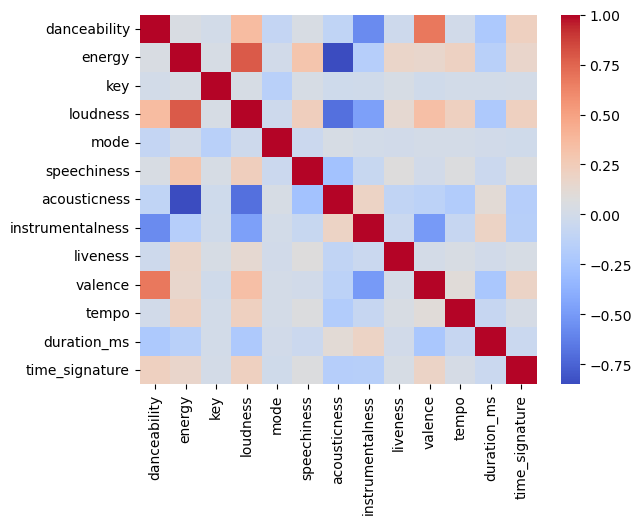

In [10]:
sns.heatmap(filtered_songs.corr(), cmap='coolwarm')

In [11]:
#shortened version of songs dataframe
songs_short = filtered_songs.drop(['time_signature', 'key', 'duration_ms'], axis=1)
songs_short.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist_id,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",0.851,0.730,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698


<AxesSubplot:>

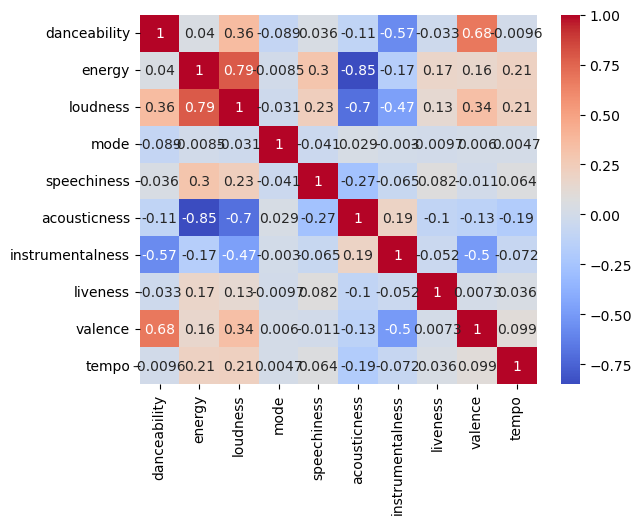

In [12]:
sns.heatmap(songs_short.corr(), annot=True, cmap='coolwarm')

MODELLING. Data scaling

In [13]:
#preprocessing and scaling data for clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [14]:
# MinMaxScaler
songs_minmax = MinMaxScaler().fit_transform(songs_short)
songs_minmax = pd.DataFrame(songs_minmax, columns=songs_short.columns, index=songs_short.index)
songs_minmax.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist_id,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.259,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.399,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",0.880041,0.730,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862


In [15]:
# StandardScaler
songs_standard = StandardScaler().fit_transform(songs_short)
songs_standard = pd.DataFrame(songs_standard, columns=songs_short.columns, index=songs_short.index)
songs_standard.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist_id,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994


Modelling. KMeans

In [16]:
from sklearn.cluster import KMeans

<AxesSubplot:xlabel='danceability', ylabel='energy'>

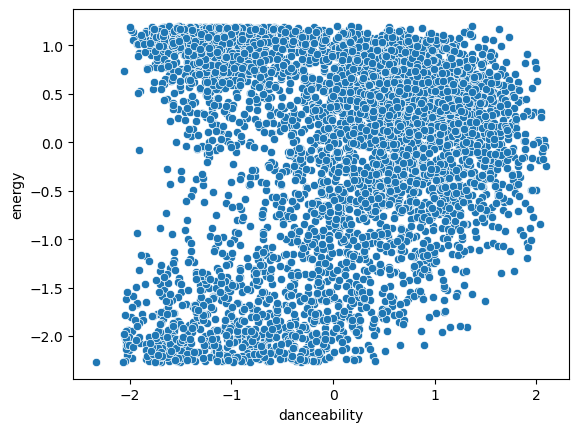

In [17]:
sns.scatterplot(data=songs_standard, x='danceability', y='energy')

In [18]:
songs_kmeans = KMeans(n_clusters=10, random_state=42).fit(songs_standard)
songs_kmeans

KMeans(n_clusters=10, random_state=42)

Visualize the relation between variables

In [19]:
#calculate centroids
centroids = pd.DataFrame(songs_kmeans.cluster_centers_, columns=songs_standard.columns)
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.820291,0.246344,0.514909,-1.351545,-0.232885,-0.363211,-0.602752,-0.186785,0.552229,-0.044202
1,-0.960748,-1.865250,-2.141325,-0.057871,-0.535684,1.810009,1.555049,-0.359423,-1.086486,-0.526639
2,-0.925659,0.852096,0.275103,-1.351545,0.251122,-0.767579,0.809128,0.003509,-0.785176,0.133304
3,0.079406,0.245487,0.379331,0.470754,-0.221798,-0.088268,-0.499198,-0.188941,0.819852,1.606629
4,-0.480856,0.668243,0.492408,0.739894,0.048541,-0.688634,-0.523265,-0.101897,-0.715177,-0.036432
5,0.793562,0.249253,0.500839,-0.165678,3.000020,-0.335609,-0.634267,-0.078980,0.494804,0.087336
6,0.217048,0.324665,0.337327,-0.074396,0.108029,-0.185355,-0.416170,3.180542,0.183922,0.121084
7,0.897866,0.180176,0.374780,0.739894,-0.338986,-0.282157,-0.596673,-0.179570,0.951801,-0.271559
8,-1.140535,0.875093,0.169267,0.739894,0.299909,-0.792750,1.411480,0.061324,-0.775013,0.089304
9,0.024427,-1.230323,-0.596076,0.175952,-0.533788,1.376594,-0.437778,-0.254530,-0.127448,-0.262696


In [20]:
#plot data
plot_data = songs_standard.copy()

#add cluster column
plot_data['cluster'] = songs_kmeans.labels_

#another way suggested by wbs
# plot_data = pd.DataFrame(songs_standard) #, columns=songs_standard.columns)
# plot_data['cluster'] = songs_kmeans.labels_
plot_data.head(3)


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist_id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,6
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,7
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,5


In [21]:
# filter cluster 1 to show what songs are in its list

plot_data[plot_data['cluster'] == 0]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist_id,,,,,,,,,,,
Blue Bossa - Remastered - Joe Henderson - 26g2HsIOznFYeJWR9zhRXZ,-0.135322,-0.765033,-0.090702,-1.351545,-0.421123,0.893261,1.178099,-0.517777,1.632718,-1.274478,0
Aqua De Coco - Marcos Valle - 1OzHkIzGMj4S3rWwF8TBjc,1.126029,0.272054,-0.041610,-1.351545,-0.244123,0.553326,-0.691828,1.798223,1.341035,-1.074483,0
Mas Que Nada - Rio Combo - 51P5Djwsur61UY4oitktOQ,0.497647,-0.397370,-0.532375,-1.351545,-0.730171,-0.376578,-0.688509,0.011021,1.701137,-1.052849,0
Mariana - Bïa - 4Lx7fiZRVb7j4U1xFZ9fyo,1.474620,-0.775439,0.178591,-1.351545,0.278449,0.601086,-0.694283,0.318929,1.341035,0.745984,0
Os Grilos - Marcos Valle - 5ZItv6TcaDqcf8Jp2se0po,0.291244,0.525256,-0.315987,-1.351545,-0.120504,0.233057,0.625018,-0.682440,0.901710,-0.654365,0
...,...,...,...,...,...,...,...,...,...,...,...
I Trust You - Radio Edit - Jonathan Traylor - 5qZREphIiL2VQ4IvuxgRnH,0.204096,-0.386964,0.097883,-1.351545,-0.327004,0.322957,-0.694249,-0.511083,-0.549504,-0.137907,0
Dance Party - Kelly Price - 66IHTfRLQGiDuMXyCsLCJ3,0.800371,0.740305,0.946753,-1.351545,-0.151409,-0.756406,-0.694283,-0.726618,1.049352,0.325446,0
Man On Fire - Idahams - 5iOKGigwmEPBSPSkM8v5lx,1.204003,0.115971,0.308234,-1.351545,1.135354,-0.689823,-0.694266,-0.919395,1.261812,-0.794218,0


<AxesSubplot:xlabel='danceability', ylabel='instrumentalness'>

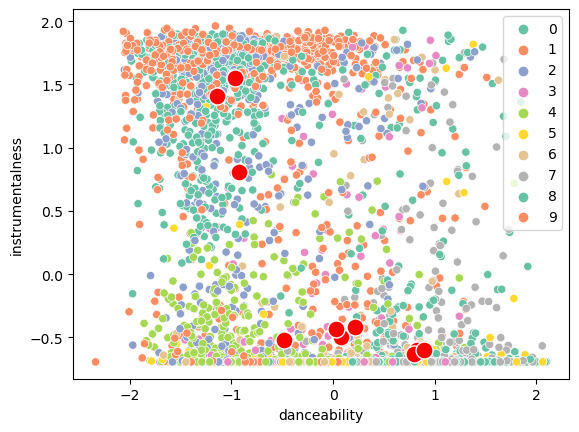

In [22]:
#you can use other variables. This bivariate plot is just for illustration
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness', hue='cluster', palette='Set2')
# sns.scatterplot(data=plot_data, x='danceability', y='liveness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='instrumentalness', color='red', s=150)
# plt.show()

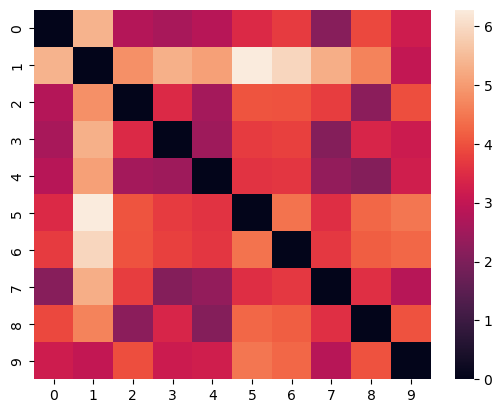

In [23]:
#calculate manhattan and euclidean distances
def manhattan_distance(data, song, song_to_compare): 
    distance = (
        pd.DataFrame({
            'song_1':data.loc[song,:],
            'song_2':data.loc[song_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.song_1 - x.song_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

def euclidean_distance(data, song, song_to_compare): 
    distance = (
        pd.DataFrame({
            'song_1':data.loc[song,:],
            'song_2':data.loc[song_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.song_1 - x.song_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance


def get_distances(data, distance_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the users/songs. 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan': 
        distances = [[manhattan_distance(data, song, song_to_compare) for song in data.index] for song_to_compare in data.index]
    else: 
        distances = [[euclidean_distance(data, song, song_to_compare) for song in data.index] for song_to_compare in data.index]
        
    return pd.DataFrame(distances, columns=data.index, index=data.index)


sns.heatmap(get_distances(centroids))
plt.show()


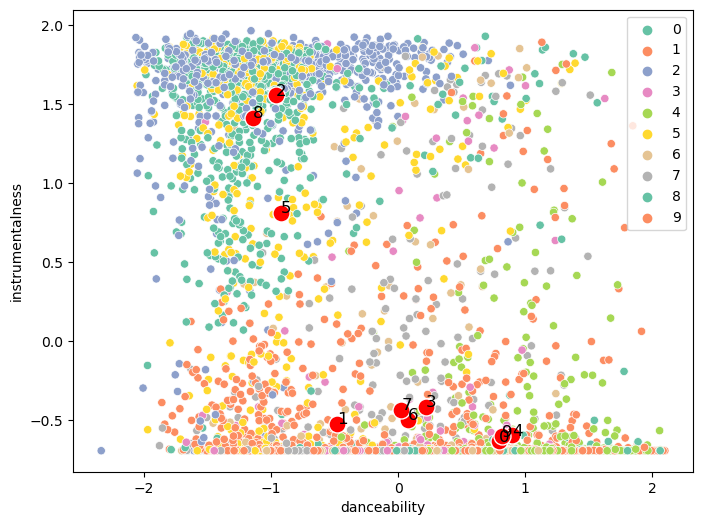

In [24]:
# visualization of the clusters with centroids
temp_kmeans = KMeans(n_clusters=10).fit(songs_standard)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_, columns=songs_standard.columns)
# centroids_temp.columns = songs_standard.columns #another way of defining columns
centroids_temp['cluster_name'] = centroids_temp.index
# centroids_temp = centroids_temp.set_index(centroids_temp.index + 1)

plot_data['cluster'] = temp_kmeans.labels_

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_temp, x='danceability', y='instrumentalness', color='red', s=150)
for i in range(centroids_temp.shape[0]):
    # plt.text(centroids_temp.iloc[i,0], centroids_temp.iloc[i,1], centroids_temp.iloc[i,2], fontsize=12) #this verion has long float numbers next to some centroids
    plt.text(x=centroids_temp['danceability'][i], y=centroids_temp['instrumentalness'][i], s=centroids_temp['cluster_name'][i], size=12) # here each centroid has a number

# plt.show()

dist_temp = get_distances(centroids_temp.drop('cluster_name', axis=1))


<AxesSubplot:>

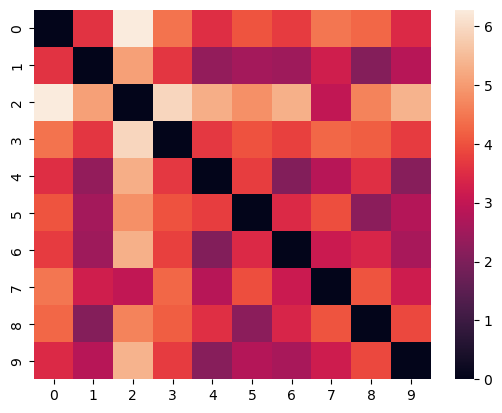

In [25]:
sns.heatmap(dist_temp)

Using intertia

In [26]:
songs_kmeans.inertia_

20304.133159047553

In [27]:
len(songs_standard)

5235

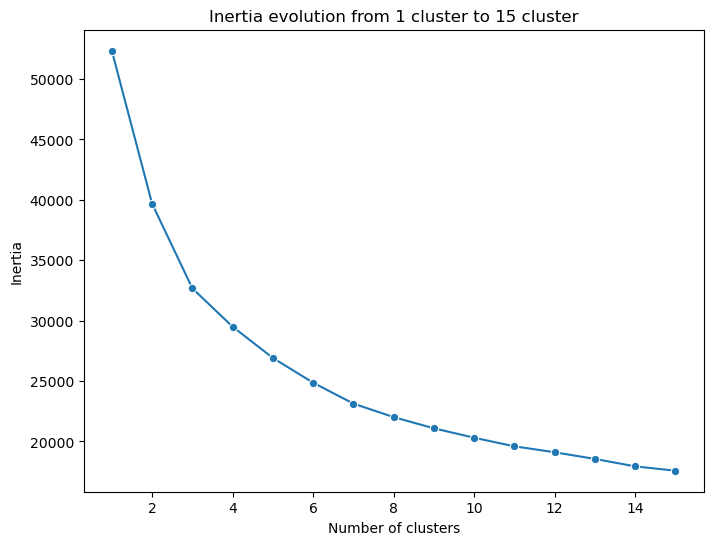

In [28]:
# this code produced value error: All arrays must be of the same length because indentation was wrong. 
#the code for plotting the graph was inside the loop. This means that a new plot is created for each iteration of the loop. 
# To fix the error, you need to move the code for plotting the graph outside the loop, so that only one plot is created with all the data.
# I had to move it to the left to make it work
max_k = 15
inertia = []

for k in range(1, max_k+1):
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(songs_standard).inertia_)

fig, ax = plt.subplots(figsize=(8,6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k+1), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# check the value of inertia at each iteration (of each k ) of the loop. Each time the number of clusters increases, the inertia decreases
# the inertia is the sum of the squared distances between each point and its centroid

inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(songs_standard)
    inertia.append(kmeans.inertia_)
    print(f"k = {k}, inertia = {inertia[-1]}")

k = 1, inertia = 52349.99999999999
k = 2, inertia = 39682.190897025896
k = 3, inertia = 32674.81542566727
k = 4, inertia = 29499.676121015516
k = 5, inertia = 26911.16635956571
k = 6, inertia = 24861.310043469566
k = 7, inertia = 23131.80911286574
k = 8, inertia = 22011.17935627918
k = 9, inertia = 21085.733325969504
k = 10, inertia = 20304.133159047553
k = 11, inertia = 19594.12057794357
k = 12, inertia = 19101.492281287225
k = 13, inertia = 18549.48384004895
k = 14, inertia = 17933.556394569576


k = 1, inertia = 52349.99999999999
k = 2, inertia = 39682.190897025896
k = 3, inertia = 32674.81542566727
k = 4, inertia = 29499.676121015516
k = 5, inertia = 26911.166359565705
k = 6, inertia = 24861.31004346957
k = 7, inertia = 23131.809112865743
k = 8, inertia = 22011.17935627918
k = 9, inertia = 21085.733325969504
k = 10, inertia = 20304.13315904755
k = 11, inertia = 19594.120577943573
k = 12, inertia = 19101.492281287225
k = 13, inertia = 18549.483840048953
k = 14, inertia = 17933.556394569576
k = 15, inertia = 17573.696785558393


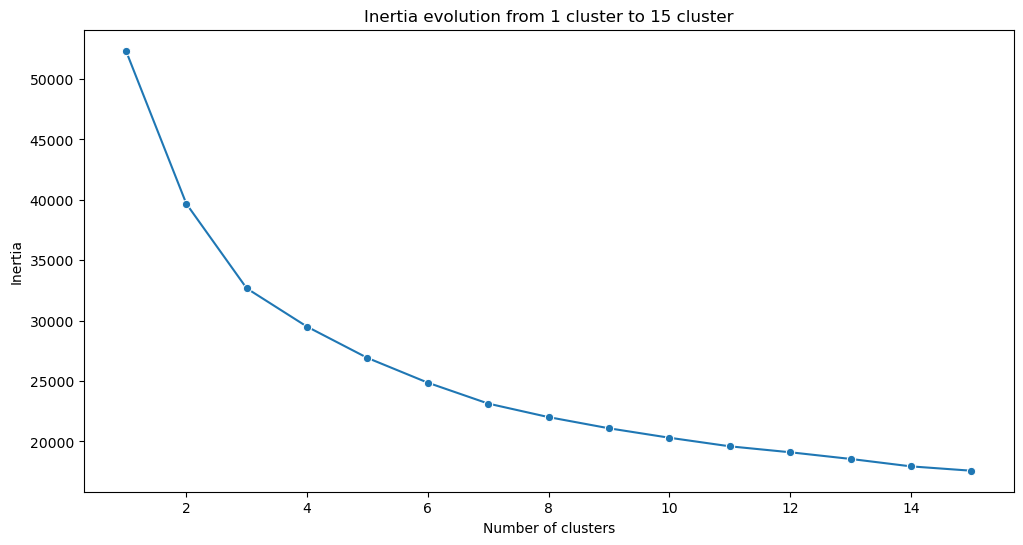

In [30]:
# this plot the inertia evolution works
inertia = []

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(songs_standard)
    inertia.append(kmeans.inertia_)
    print(f'k = {k}, inertia = {kmeans.inertia_}')
    
plt.figure(figsize=(12,6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k+1), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



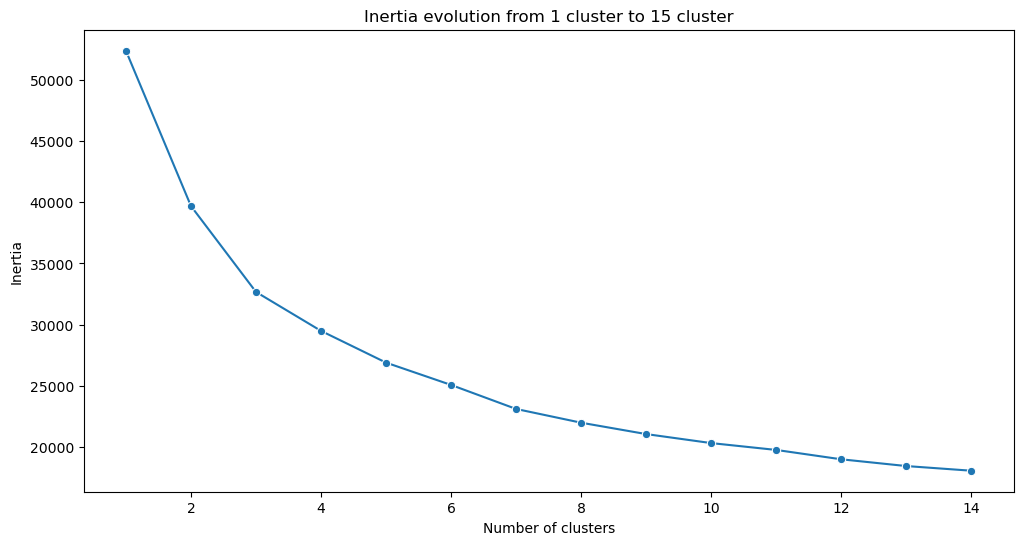

In [31]:
# this code is from the solution notebook. It works
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_standard).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Silhouette score

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_standard, songs_kmeans.labels_)

0.19307025552642249

<AxesSubplot:title={'center':'Silhouette score evolution from 2 clusters to 15 clusters'}>

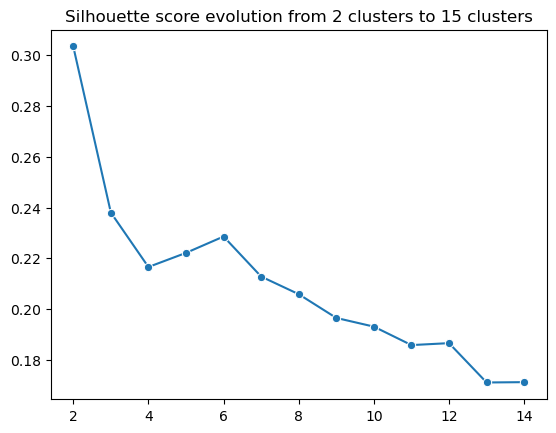

In [33]:
# for loop for silhouette score

max_k = 15
sil_score = []

for k in range(2, max_k):
    labels = KMeans(n_clusters=k, random_state=42).fit(songs_standard).labels_
    sil_score.append(silhouette_score(songs_standard, labels))
    #if you want to split the code in tow lines, you need to create a variable for the KMeans object
    # kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans.fit(songs_standard)
    # sil_score.append(silhouette_score(songs_standard, kmeans.labels_))
    # print(f'k = {k}, silhouette score = {sil_score[-1]}')

plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
# plt.show()


# The silhouette coefficient can vary between -1 and +1:
# A value close to +1 means that the point is well inside its own cluster and far from other clusters.
# A value close to -1 means that the point is close to the border between two clusters.  -1 the instance may have been assigned to the wrong cluster.
# A value close to 0 means that the point is close to the border between two clusters. 0 the instance is close to a cluster boundary.



* For k = 2 the average to silhouette is: 0.3034
	- For cluster = 0 the silhouette value is: 0.3
	- For cluster = 1 the silhouette value is: 0.33


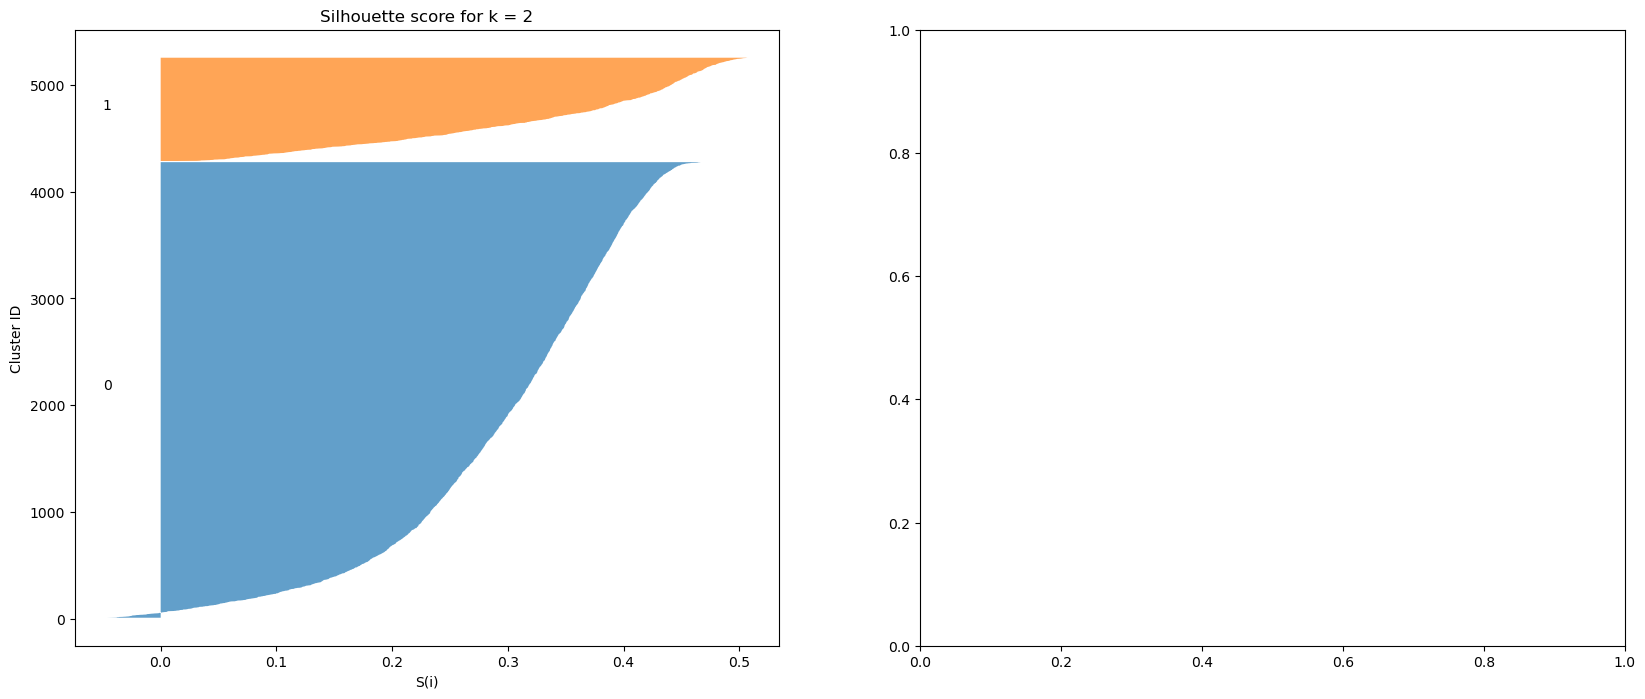

* For k = 3 the average to silhouette is: 0.238
	- For cluster = 0 the silhouette value is: 0.23
	- For cluster = 1 the silhouette value is: 0.22
	- For cluster = 2 the silhouette value is: 0.32


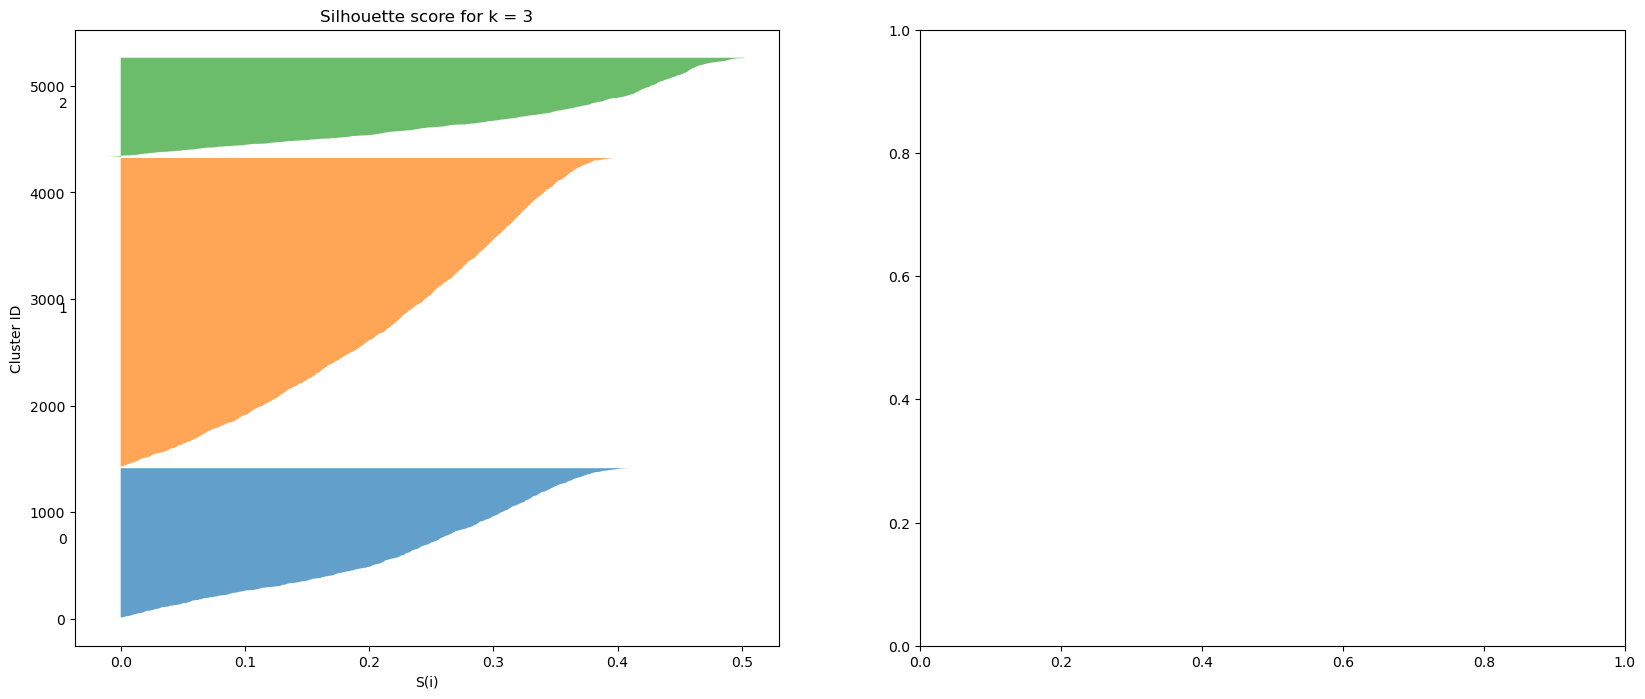

* For k = 4 the average to silhouette is: 0.2166
	- For cluster = 0 the silhouette value is: 0.19
	- For cluster = 1 the silhouette value is: 0.32
	- For cluster = 2 the silhouette value is: 0.23
	- For cluster = 3 the silhouette value is: 0.17


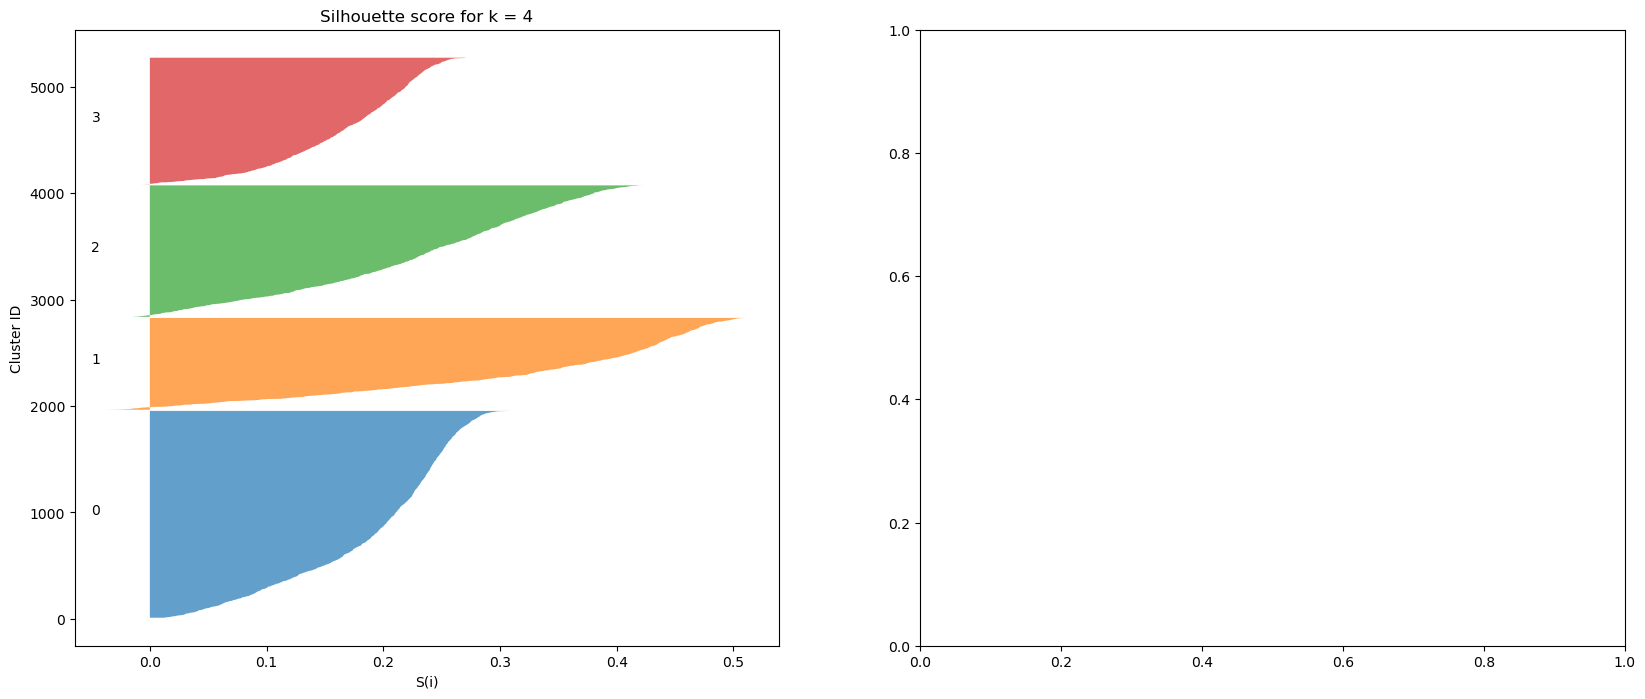

* For k = 5 the average to silhouette is: 0.2222
	- For cluster = 0 the silhouette value is: 0.31
	- For cluster = 1 the silhouette value is: 0.12
	- For cluster = 2 the silhouette value is: 0.2
	- For cluster = 3 the silhouette value is: 0.2
	- For cluster = 4 the silhouette value is: 0.23


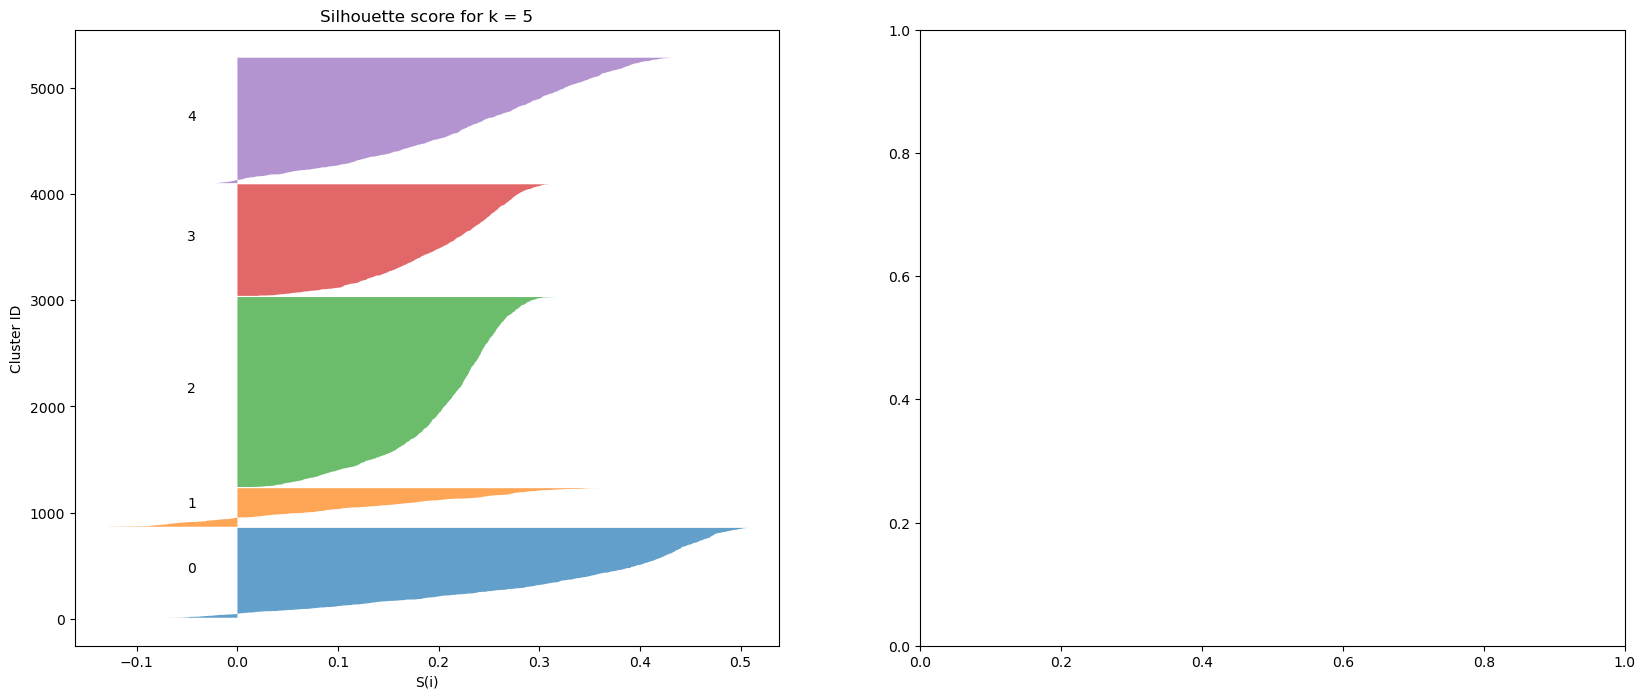

* For k = 6 the average to silhouette is: 0.2286
	- For cluster = 0 the silhouette value is: 0.13
	- For cluster = 1 the silhouette value is: 0.24
	- For cluster = 2 the silhouette value is: 0.22
	- For cluster = 3 the silhouette value is: 0.22
	- For cluster = 4 the silhouette value is: 0.32
	- For cluster = 5 the silhouette value is: 0.13


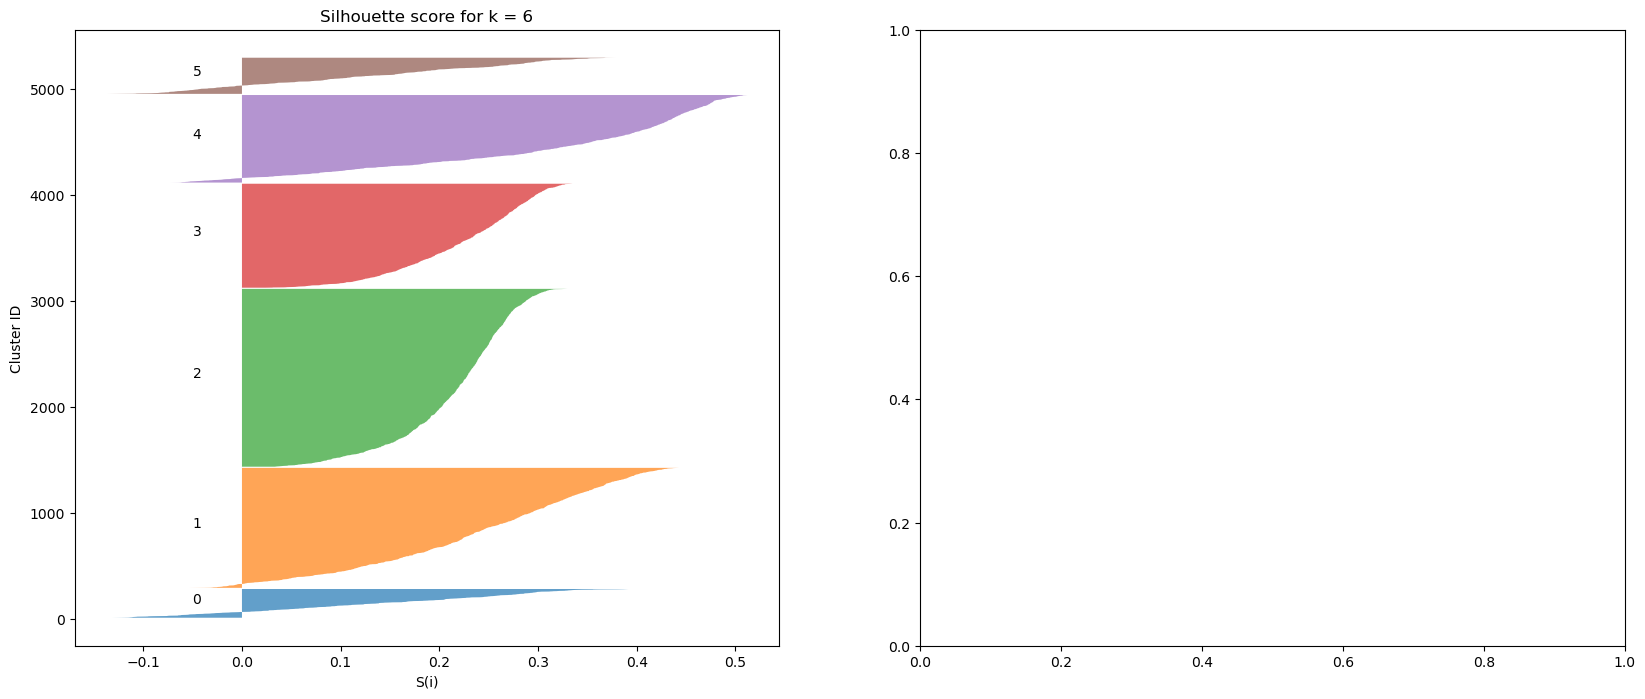

* For k = 7 the average to silhouette is: 0.2128
	- For cluster = 0 the silhouette value is: 0.12
	- For cluster = 1 the silhouette value is: 0.23
	- For cluster = 2 the silhouette value is: 0.22
	- For cluster = 3 the silhouette value is: 0.15
	- For cluster = 4 the silhouette value is: 0.27
	- For cluster = 5 the silhouette value is: 0.13
	- For cluster = 6 the silhouette value is: 0.23


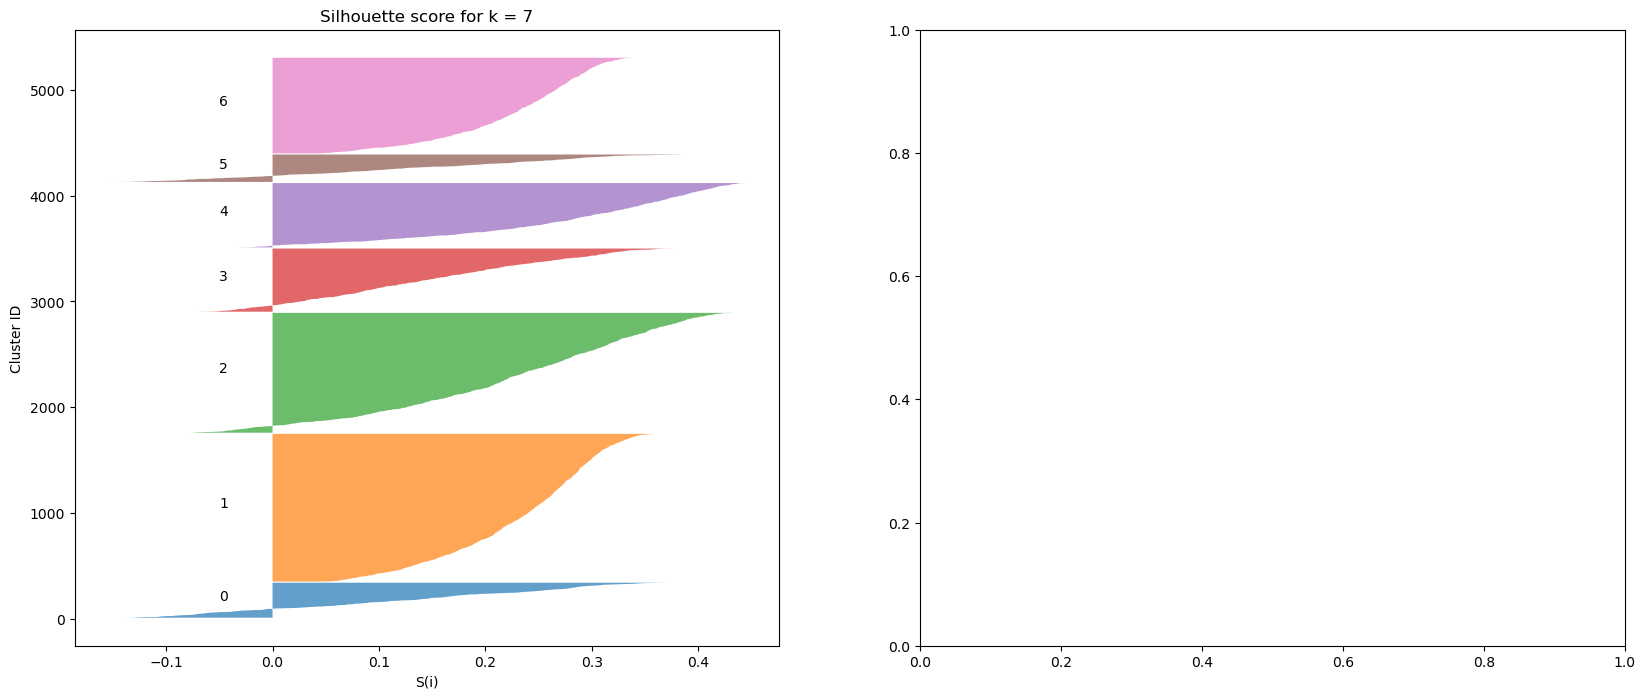

* For k = 8 the average to silhouette is: 0.2058
	- For cluster = 0 the silhouette value is: 0.12
	- For cluster = 1 the silhouette value is: 0.22
	- For cluster = 2 the silhouette value is: 0.19
	- For cluster = 3 the silhouette value is: 0.12
	- For cluster = 4 the silhouette value is: 0.28
	- For cluster = 5 the silhouette value is: 0.24
	- For cluster = 6 the silhouette value is: 0.14
	- For cluster = 7 the silhouette value is: 0.2


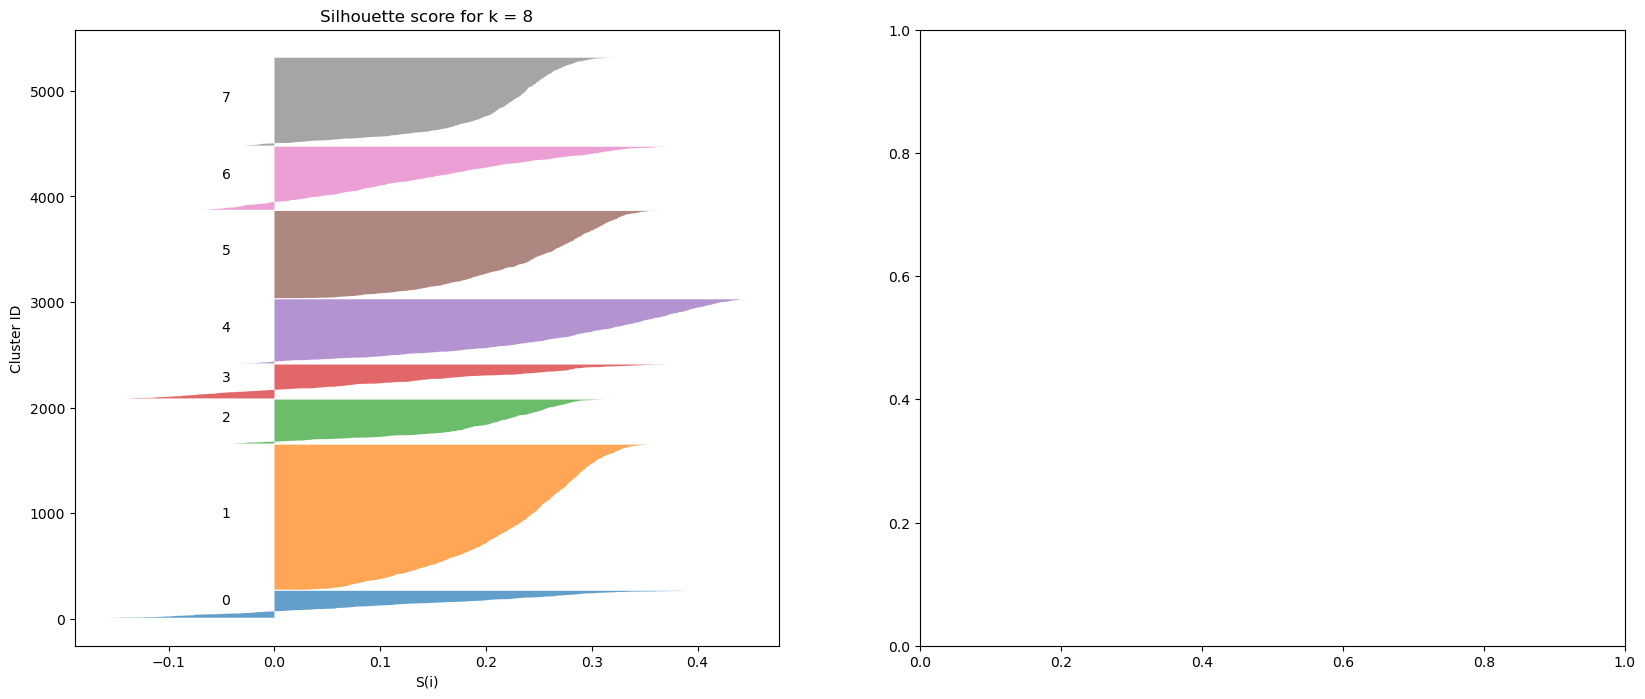

* For k = 9 the average to silhouette is: 0.1868
	- For cluster = 0 the silhouette value is: 0.21
	- For cluster = 1 the silhouette value is: 0.14
	- For cluster = 2 the silhouette value is: 0.23
	- For cluster = 3 the silhouette value is: 0.27
	- For cluster = 4 the silhouette value is: 0.21
	- For cluster = 5 the silhouette value is: 0.12
	- For cluster = 6 the silhouette value is: 0.18
	- For cluster = 7 the silhouette value is: 0.12
	- For cluster = 8 the silhouette value is: 0.1


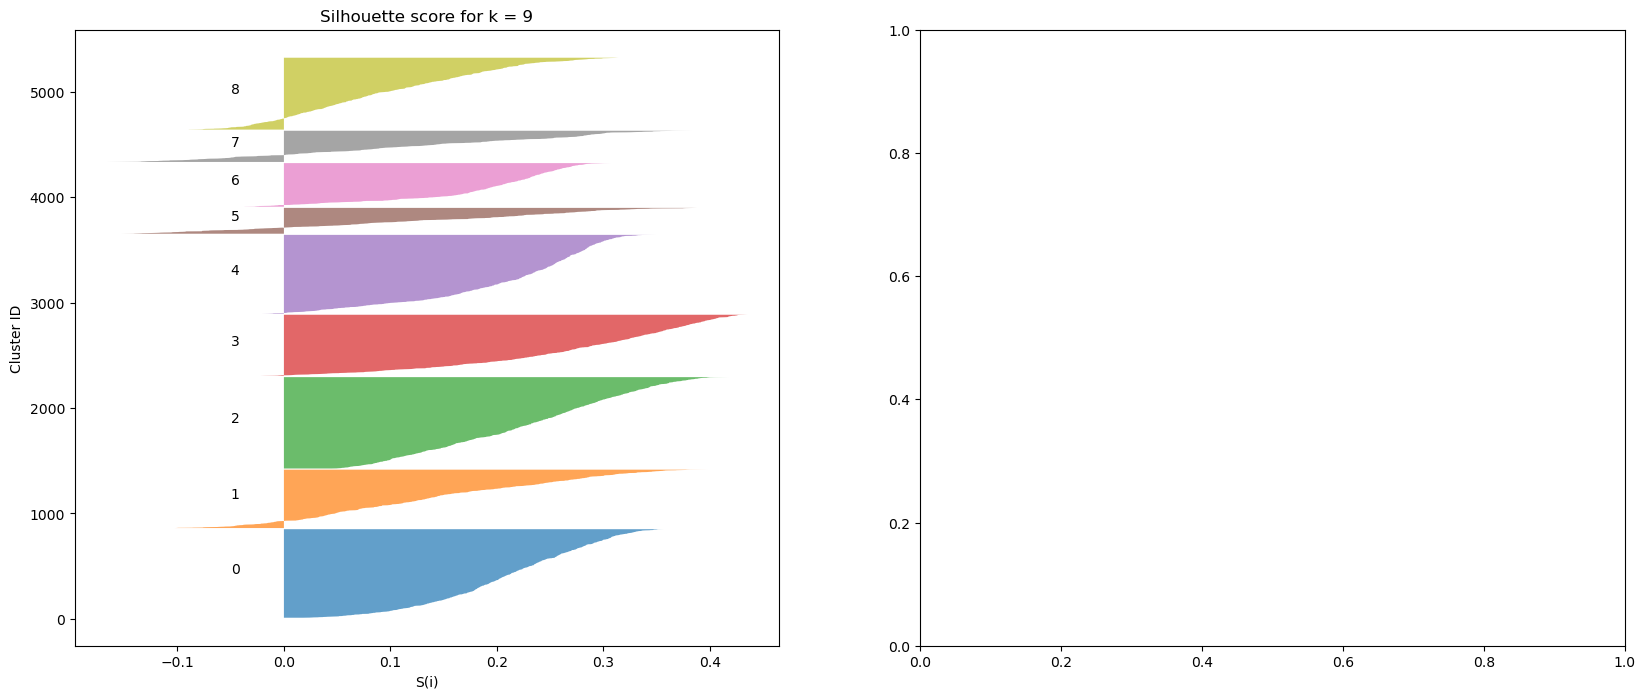

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 10
data = songs_standard

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    # if 1 < k: 
    #     centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
    #     centr_df_temp.columns = columns
    #     centr_df_temp['cluster_name'] = centr_df_temp.index

    #     plot_data = pd.DataFrame(data)
    #     plot_data.columns = columns
    #     plot_data['cluster'] = kmean_model.predict(data)

    #     plt.title('Penguins clusters with centroids using Kmeans')
    #     sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
    #     sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
    #     for i in range(centr_df_temp.shape[0]):
    #         plt.text(
    #             x=centr_df_temp.bill_length_mm[i], 
    #             y=centr_df_temp.bill_depth_mm[i],
    #             s=centr_df_temp.cluster_name[i], 
    #             size=20
    #         )
        plt.show()

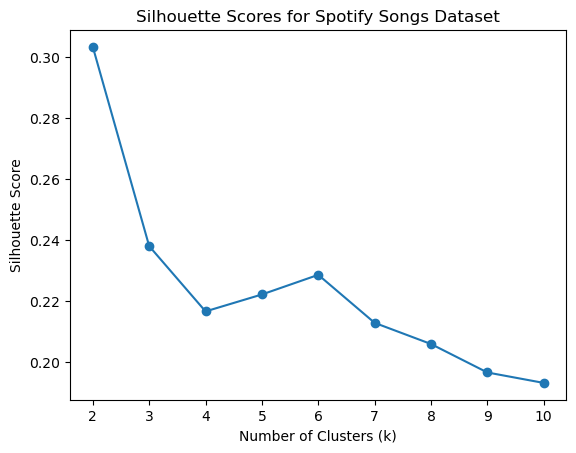

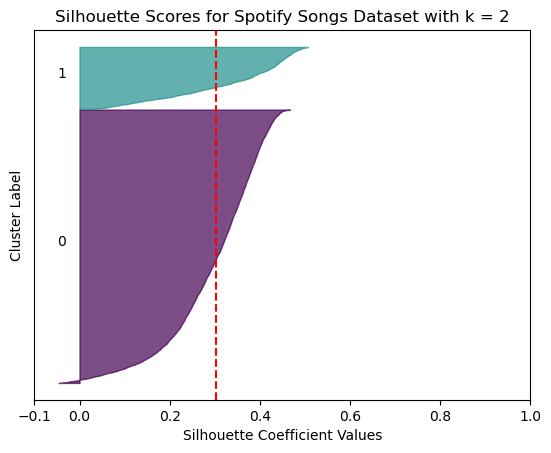

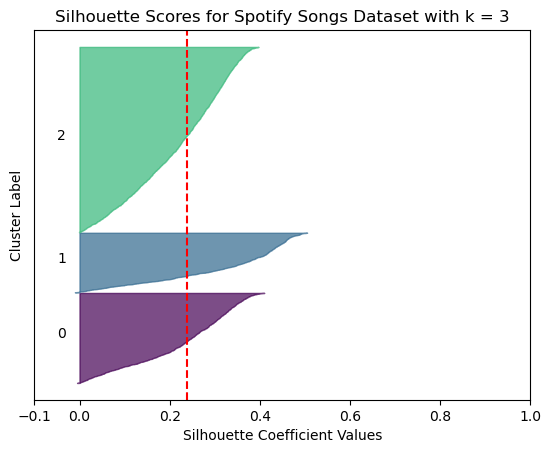

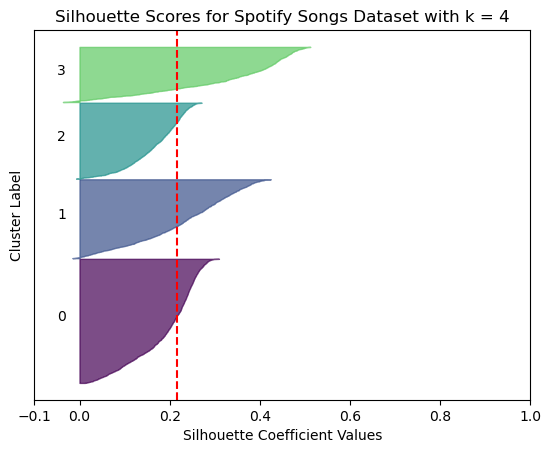

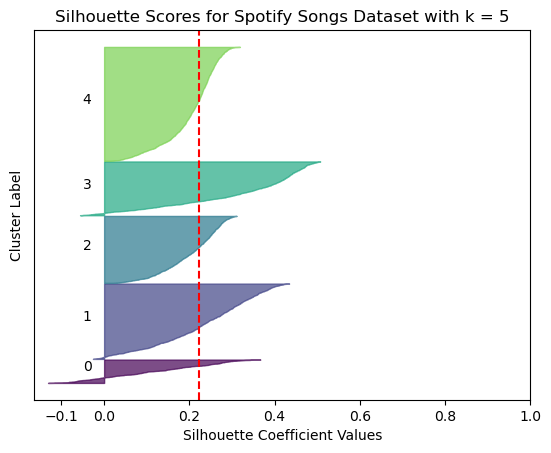

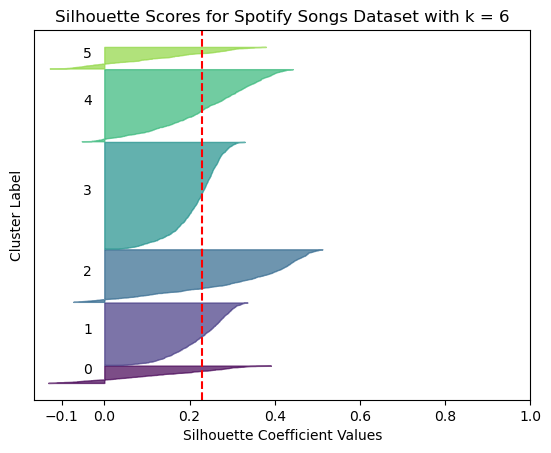

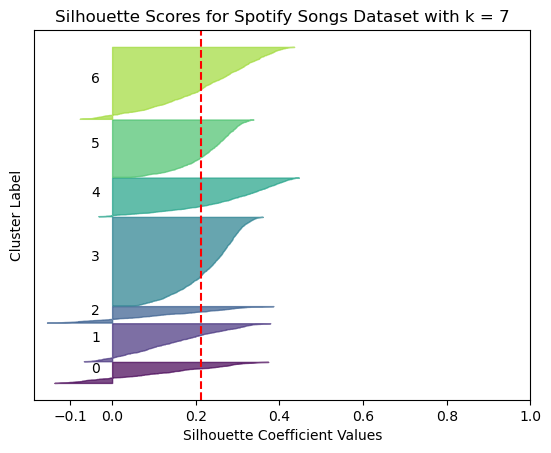

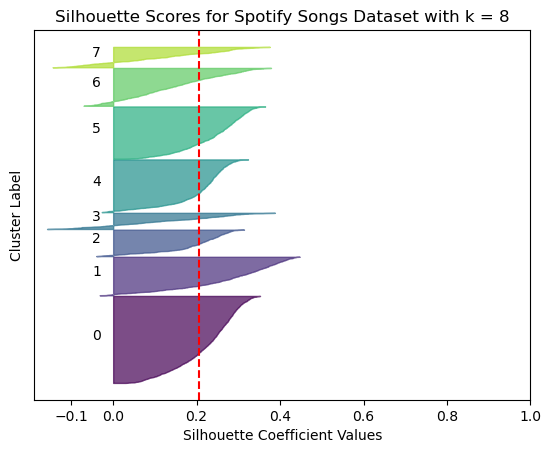

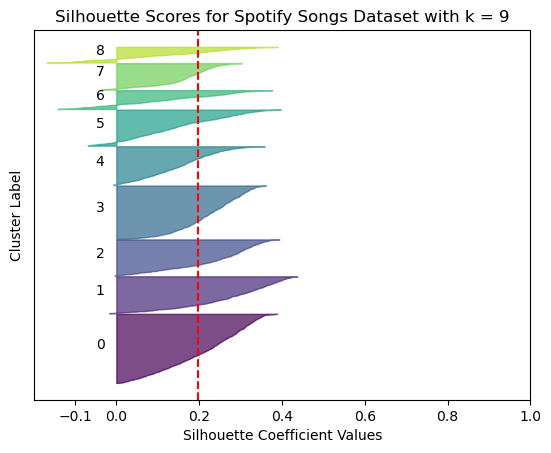

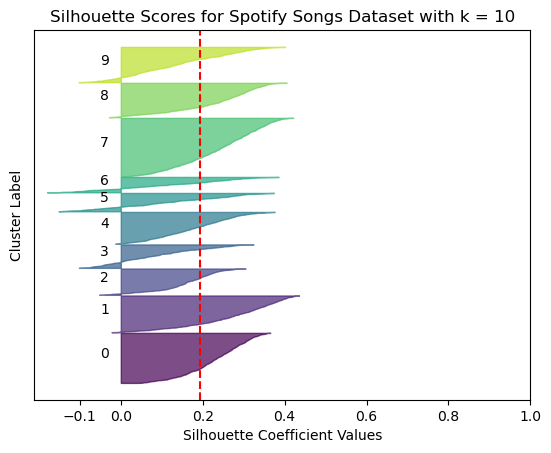

In [35]:
# This code provides a better visualisation of the knives chart
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap
# import seaborn as sns
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# # Drop rows with missing values
# penguins = penguins.dropna()

# # Prepare the features for clustering
# features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# scaled_features = StandardScaler().fit_transform(features)

features = songs_standard.copy()
scaled_features = StandardScaler().fit_transform(features)

import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Spotify Songs Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Spotify Songs Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)

   


calculate centroid songs

In [36]:
# create 4 clusters
kmeans = KMeans(n_clusters=10)

# new df 
songs_center = songs_standard.copy()

# fit the model
kmeans.fit(songs_center)

# create a column with the cluster labels
songs_center['cluster'] = kmeans.labels_

songs_center.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist_id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,3
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,5
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,8


In [37]:
# creating new dfs for merging centroids and songs

centroids_copy = centroids.rename(columns=lambda x: x + '_centroid')
centroids_copy = centroids_copy.reset_index().rename(columns={'index': 'cluster'})
centroids_copy.head(12)


,cluster,danceability_centroid,energy_centroid,loudness_centroid,mode_centroid,speechiness_centroid,acousticness_centroid,instrumentalness_centroid,liveness_centroid,valence_centroid,tempo_centroid
0,0,0.820291,0.246344,0.514909,-1.351545,-0.232885,-0.363211,-0.602752,-0.186785,0.552229,-0.044202
1,1,-0.960748,-1.865250,-2.141325,-0.057871,-0.535684,1.810009,1.555049,-0.359423,-1.086486,-0.526639
2,2,-0.925659,0.852096,0.275103,-1.351545,0.251122,-0.767579,0.809128,0.003509,-0.785176,0.133304
3,3,0.079406,0.245487,0.379331,0.470754,-0.221798,-0.088268,-0.499198,-0.188941,0.819852,1.606629
4,4,-0.480856,0.668243,0.492408,0.739894,0.048541,-0.688634,-0.523265,-0.101897,-0.715177,-0.036432
5,5,0.793562,0.249253,0.500839,-0.165678,3.000020,-0.335609,-0.634267,-0.078980,0.494804,0.087336
6,6,0.217048,0.324665,0.337327,-0.074396,0.108029,-0.185355,-0.416170,3.180542,0.183922,0.121084
7,7,0.897866,0.180176,0.374780,0.739894,-0.338986,-0.282157,-0.596673,-0.179570,0.951801,-0.271559
8,8,-1.140535,0.875093,0.169267,0.739894,0.299909,-0.792750,1.411480,0.061324,-0.775013,0.089304
9,9,0.024427,-1.230323,-0.596076,0.175952,-0.533788,1.376594,-0.437778,-0.254530,-0.127448,-0.262696


In [38]:
songs_center.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist_id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,3
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,5
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,8


In [39]:
# merge centroids and songs
songs_with_centroids = (
    songs_center
    .merge(centroids_copy, on='cluster', how='left')
)

songs_with_centroids['name_artist'] = songs_center.index
songs_with_centroids = songs_with_centroids.set_index('name_artist')
songs_with_centroids.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,danceability_centroid,energy_centroid,loudness_centroid,mode_centroid,speechiness_centroid,acousticness_centroid,instrumentalness_centroid,liveness_centroid,valence_centroid,tempo_centroid
name_artist,,,,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,...,0.079406,0.245487,0.379331,0.470754,-0.221798,-0.088268,-0.499198,-0.188941,0.819852,1.606629
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,...,0.793562,0.249253,0.500839,-0.165678,3.000020,-0.335609,-0.634267,-0.078980,0.494804,0.087336
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,...,-1.140535,0.875093,0.169267,0.739894,0.299909,-0.792750,1.411480,0.061324,-0.775013,0.089304


In [40]:
(
songs_with_centroids
    .assign(
        distance = lambda x: (x['acousticness'] - x['acousticness_centroid'])**2 + 
        (x['danceability'] - x['danceability_centroid'])**2 + 
        (x['energy'] - x['energy_centroid'])**2 + 
        (x['instrumentalness'] - x['instrumentalness_centroid'])**2 + 
        (x['liveness'] - x['liveness_centroid'])**2 + 
        (x['loudness'] - x['loudness_centroid'])**2 + 
        (x['speechiness'] - x['speechiness_centroid'])**2 + 
        (x['tempo'] - x['tempo_centroid'])**2 + 
        (x['valence'] - x['valence_centroid'])**2
    )
    .groupby('cluster')
        # get top 5 songs with the smallest distance
    .apply(lambda x: x.nsmallest(100, 'distance'))
)

danceability  \
cluster name_artist                                                        
0       Drown (feat. Clinton Kane)                     ...      0.291244   
        Euphoria                                       ...      0.387565   
        Wenn sie tanzt                                 ...      0.639835   
        Wasted                                         ...      0.589381   
        Into You                                       ...      0.520580   
...                                                                  ...   
9       Walk on By                                     ...      0.873759   
        Nobody Does It Better                          ...     -0.649036   
        August Day Song                                ...      0.956320   
        Tell Me Now So I Know                          ...      0.057320   
        Rebel Rebel                                    ...      0.928799   

                                                              energy  \
cluster name_artist                                                    
0       Drown (feat. Clinton Kane)                     ...  0.296334   
        Euphoria                                       ...  0.407327   
        Wenn sie tanzt                                 ...  0.195747   
        Wasted                                         ...  0.563410   
        Into You                                       ...  0.278991   
...                                                              ...   
9       Walk on By                                     ... -1.122291   
        Nobody Does It Better                          ... -0.869089   
        August Day Song                                ... -1.247157   
        Tell Me Now So I Know                          ... -1.666848   
        Rebel Rebel                                    ... -1.344276   

                                                            loudness  \
cluster name_artist                                                    
0       Drown (feat. Clinton Kane)                     ...  0.616928   
        Euphoria                                       ...  0.498566   
        Wenn sie tanzt                                 ...  0.407213   
        Wasted                                         ...  0.609302   
        Into You                                       ...  0.538603   
...                                                              ...   
9       Walk on By                                     ...  0.049426   
        Nobody Does It Better                          ... -0.533964   
        August Day Song                                ... -0.636121   
        Tell Me Now So I Know                          ... -0.594654   
        Rebel Rebel                                    ... -0.749558   

                                                                mode  \
cluster name_artist                                                    
0       Drown (feat. Clinton Kane)                     ...  0.739894   
        Euphoria                                       ...  0.739894   
        Wenn sie tanzt                                 ...  0.739894   
        Wasted                                         ...  0.739894   
        Into You                                       ...  0.739894   
...                                                              ...   
9       Walk on By                                     ...  0.739894   
        Nobody Does It Better                          ...  0.739894   
        August Day Song                                ... -1.351545   
        Tell Me Now So I Know                          ... -1.351545   
        Rebel Rebel                                    ... -1.351545   

                                                            speechiness  \
cluster name_artist                                                       
0       Drown (feat. Clinton Kane)                     ...    -0.352290   
        Euphoria                   

In [41]:
# drop the centroid columns
centroid_distances = songs_with_centroids.drop(columns={col for col in songs_with_centroids.columns if 'centroid' in col})
centroid_distances.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,3
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,5
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,8


Silhouette score with calculated centroid distances

<AxesSubplot:title={'center':'Silhouette score evolution from 2 clusters to 50 clusters'}>

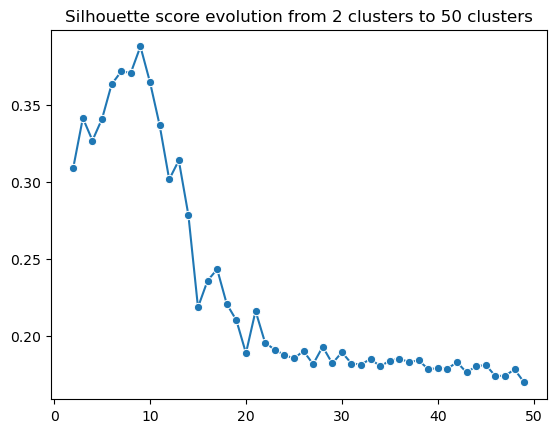

In [42]:
# for loop for silhouette score

max_k = 50
sil_score = []

for k in range(2, max_k):
    labels = KMeans(n_clusters=k, random_state=42).fit(centroid_distances).labels_
    sil_score.append(silhouette_score(centroid_distances, labels))
    #if you want to split the code in tow lines, you need to create a variable for the KMeans object
    # kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans.fit(centroid_distances)
    # sil_score.append(silhouette_score(centroid_distances, kmeans.labels_))
    # print(f'k = {k}, silhouette score = {sil_score[-1]}')

plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
# plt.show()



* For k = 2 the average to silhouette is: 0.3092
	- For cluster = 0 the silhouette value is: 0.34
	- For cluster = 1 the silhouette value is: 0.28


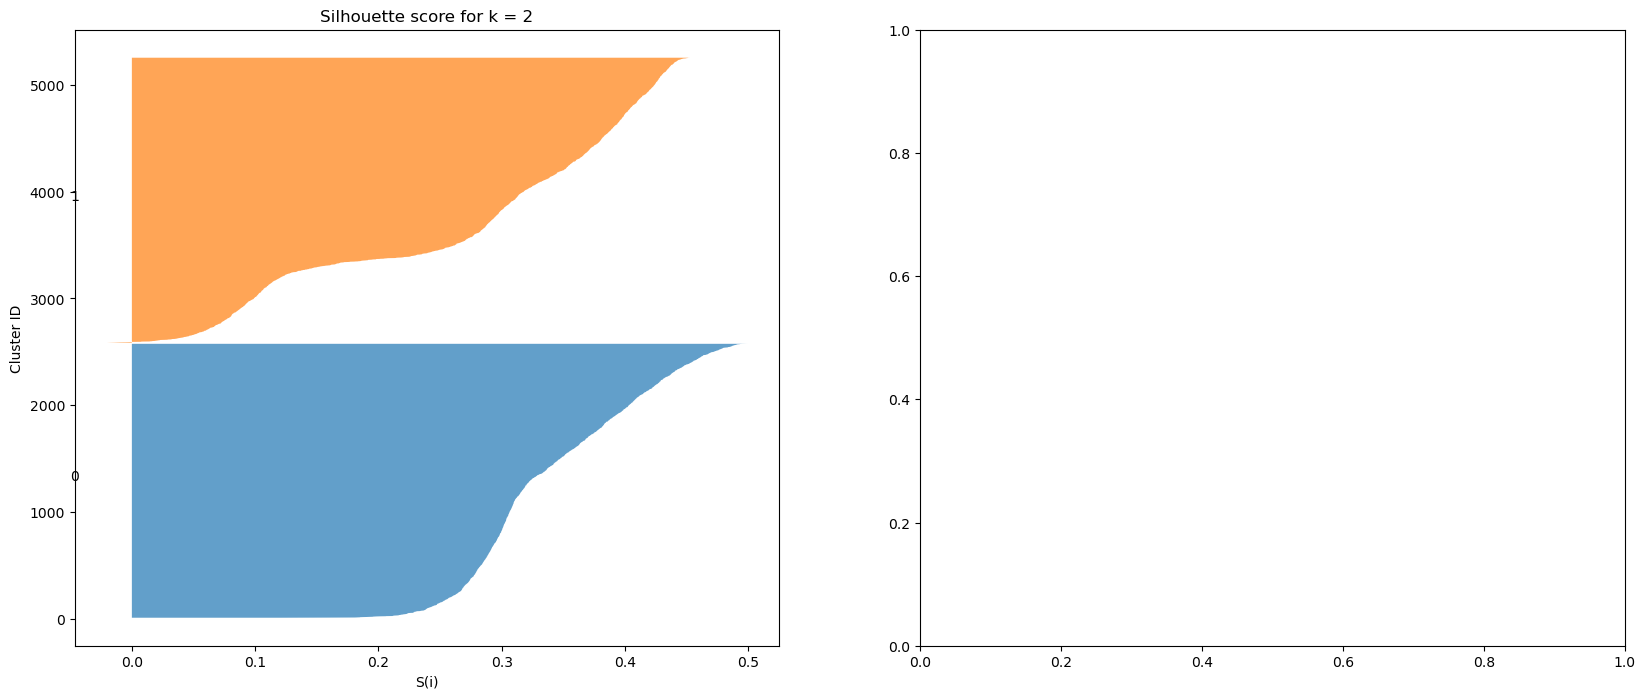

* For k = 3 the average to silhouette is: 0.3414
	- For cluster = 0 the silhouette value is: 0.49
	- For cluster = 1 the silhouette value is: 0.28
	- For cluster = 2 the silhouette value is: 0.4


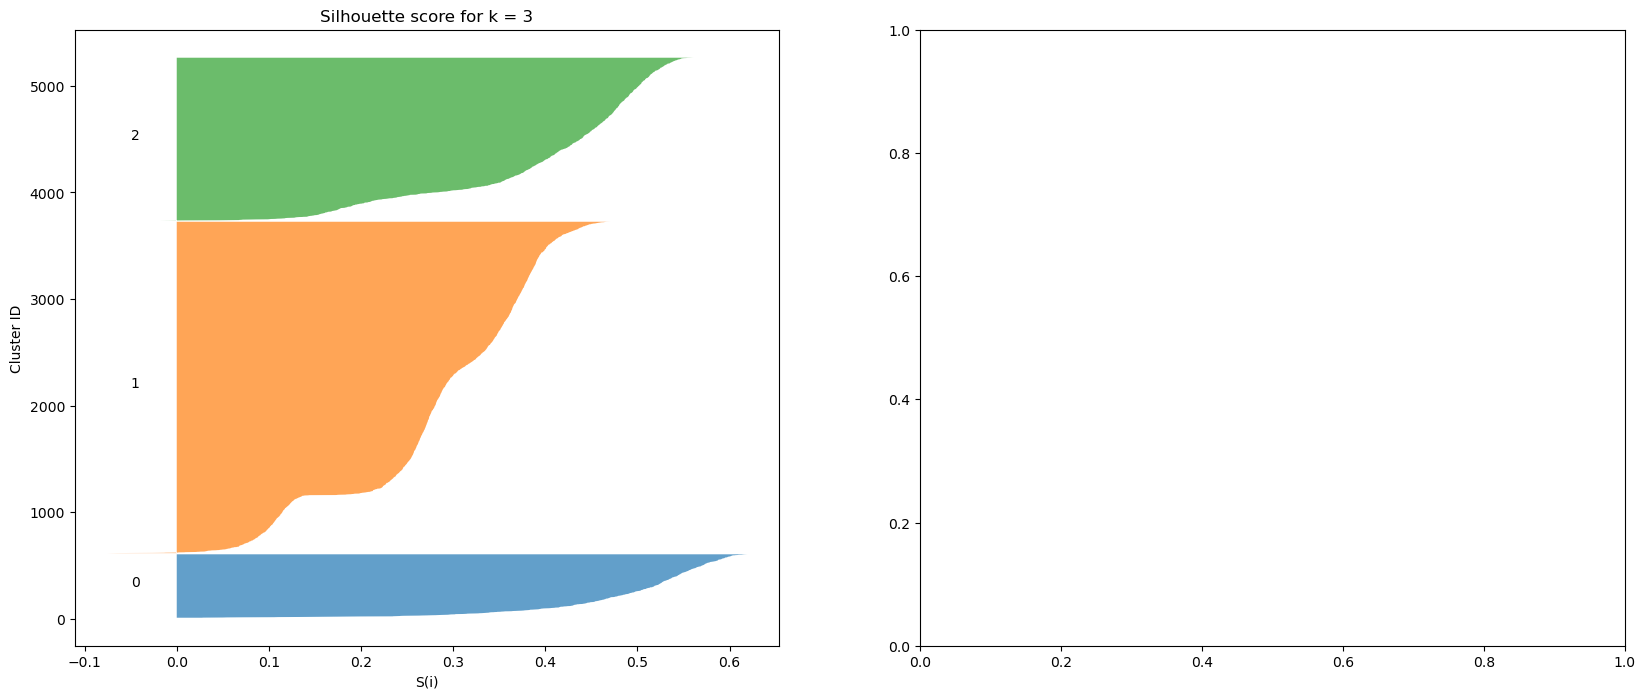

* For k = 4 the average to silhouette is: 0.3269
	- For cluster = 0 the silhouette value is: 0.2
	- For cluster = 1 the silhouette value is: 0.45
	- For cluster = 2 the silhouette value is: 0.28
	- For cluster = 3 the silhouette value is: 0.48


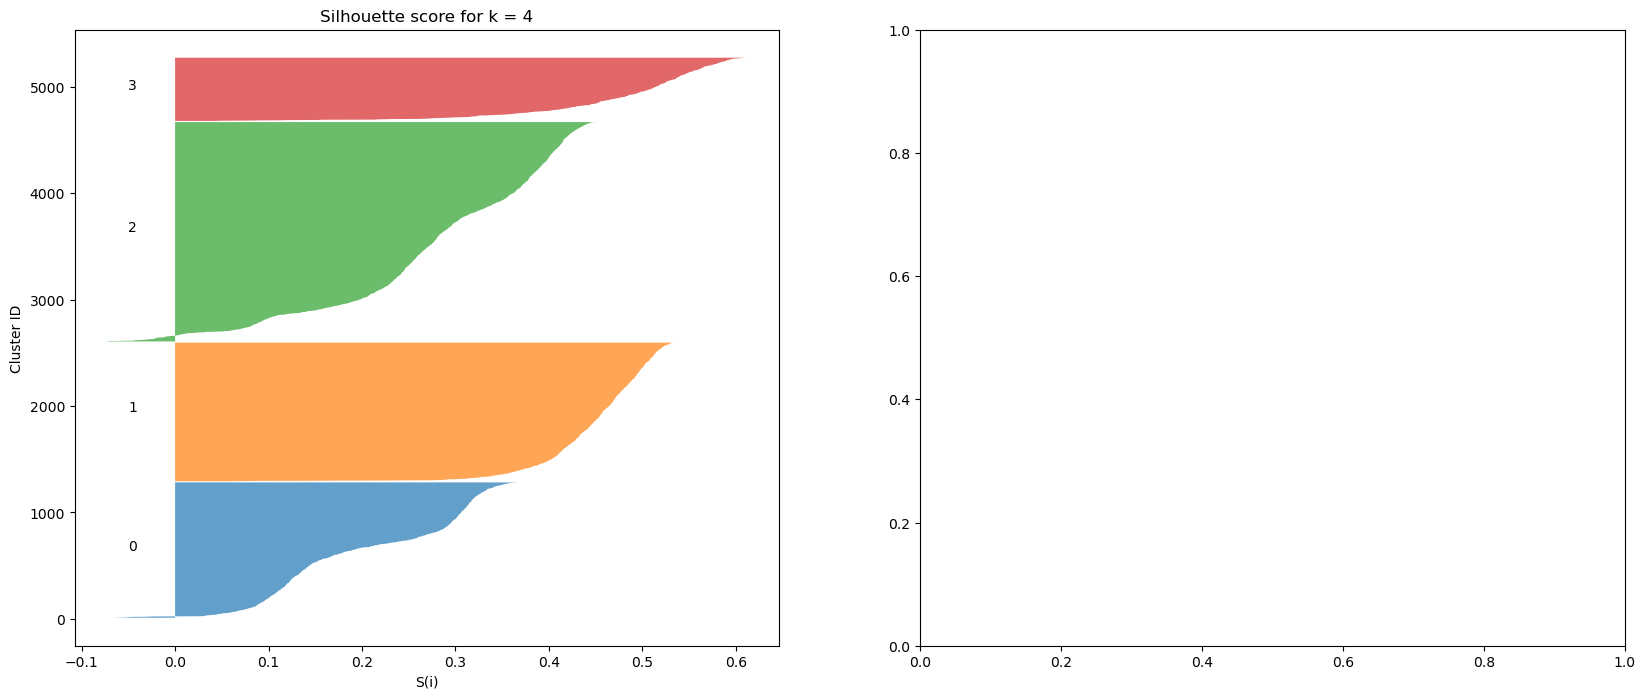

* For k = 5 the average to silhouette is: 0.341
	- For cluster = 0 the silhouette value is: 0.36
	- For cluster = 1 the silhouette value is: 0.4
	- For cluster = 2 the silhouette value is: 0.49
	- For cluster = 3 the silhouette value is: 0.22
	- For cluster = 4 the silhouette value is: 0.25


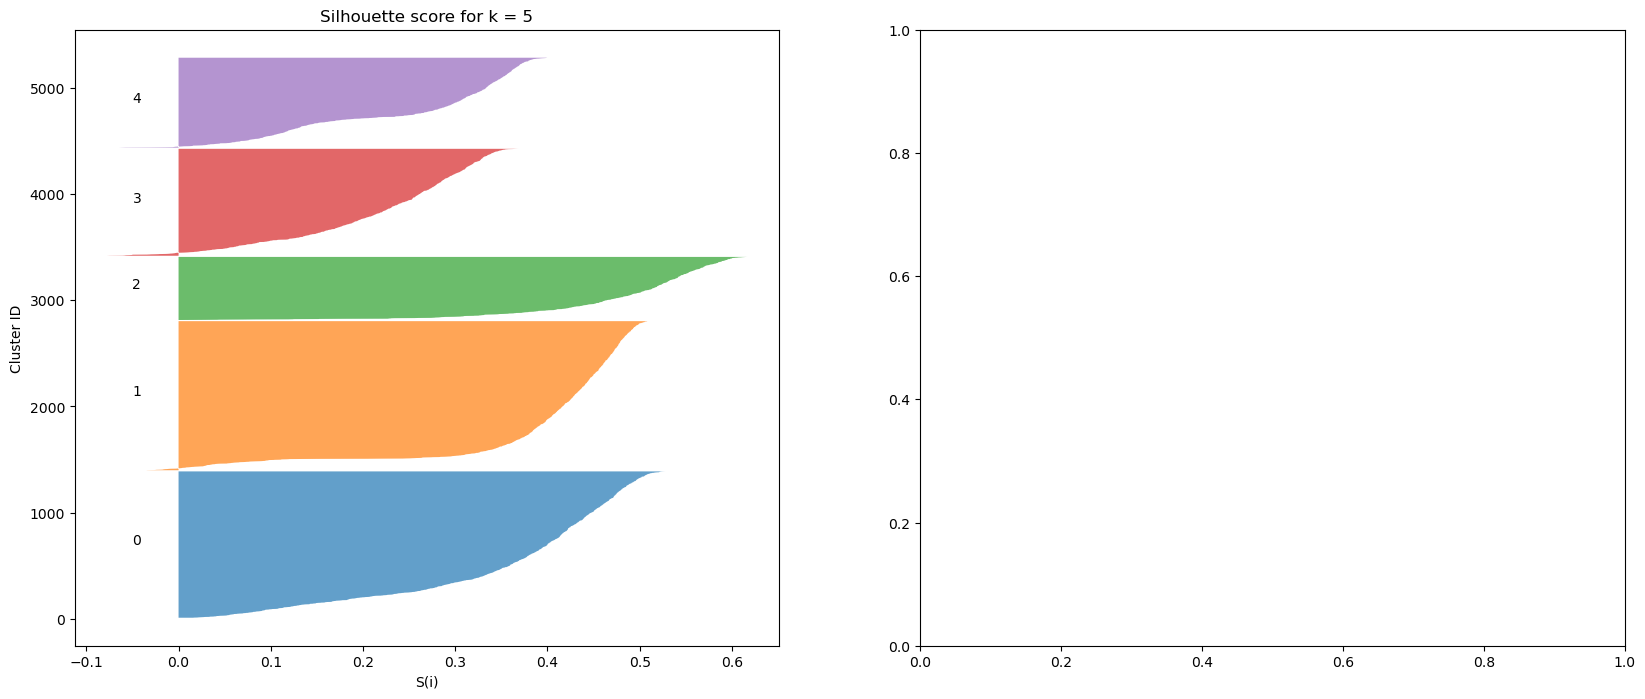

* For k = 6 the average to silhouette is: 0.3634
	- For cluster = 0 the silhouette value is: 0.42
	- For cluster = 1 the silhouette value is: 0.41
	- For cluster = 2 the silhouette value is: 0.48
	- For cluster = 3 the silhouette value is: 0.46
	- For cluster = 4 the silhouette value is: 0.18
	- For cluster = 5 the silhouette value is: 0.21


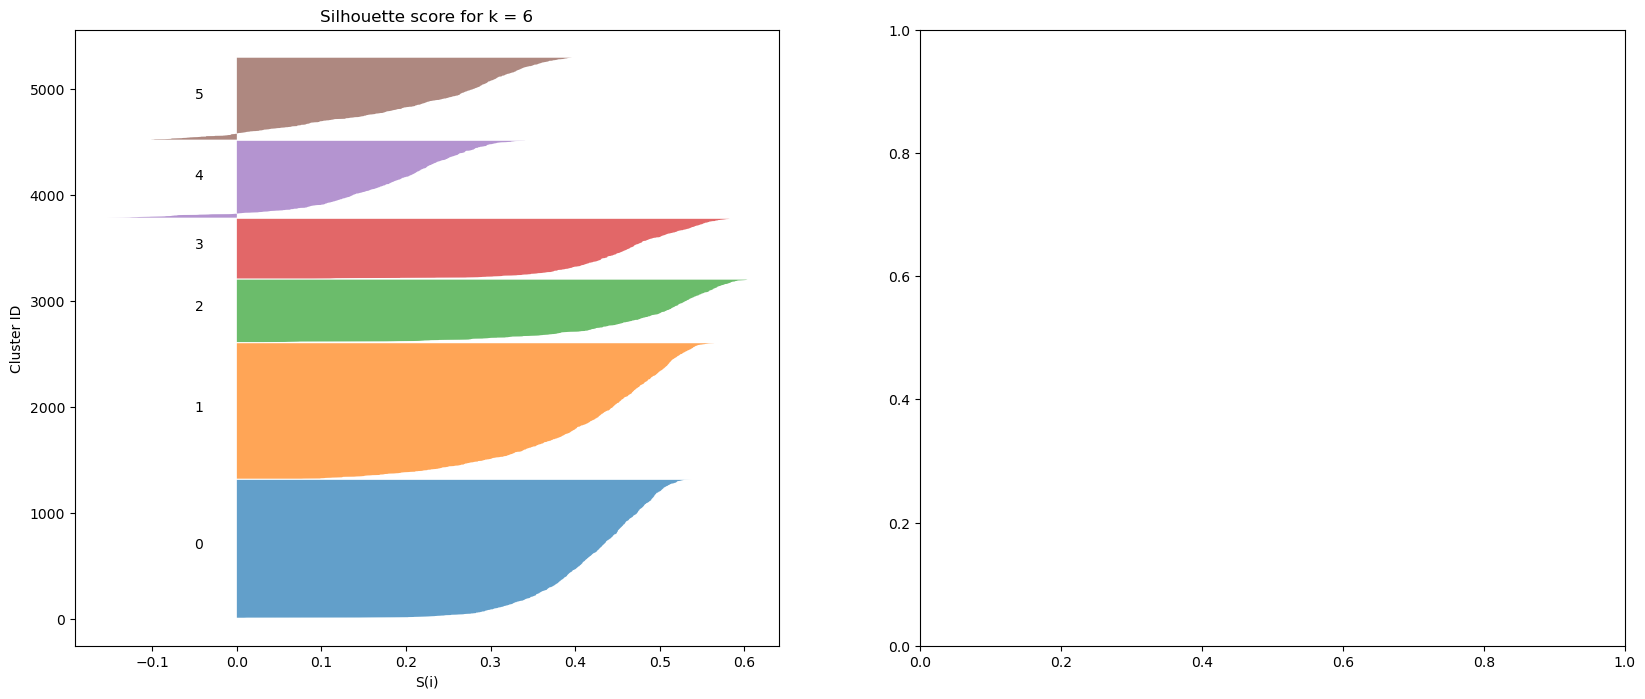

* For k = 7 the average to silhouette is: 0.3818
	- For cluster = 0 the silhouette value is: 0.42
	- For cluster = 1 the silhouette value is: 0.44
	- For cluster = 2 the silhouette value is: 0.48
	- For cluster = 3 the silhouette value is: 0.2
	- For cluster = 4 the silhouette value is: 0.39
	- For cluster = 5 the silhouette value is: 0.29
	- For cluster = 6 the silhouette value is: 0.4


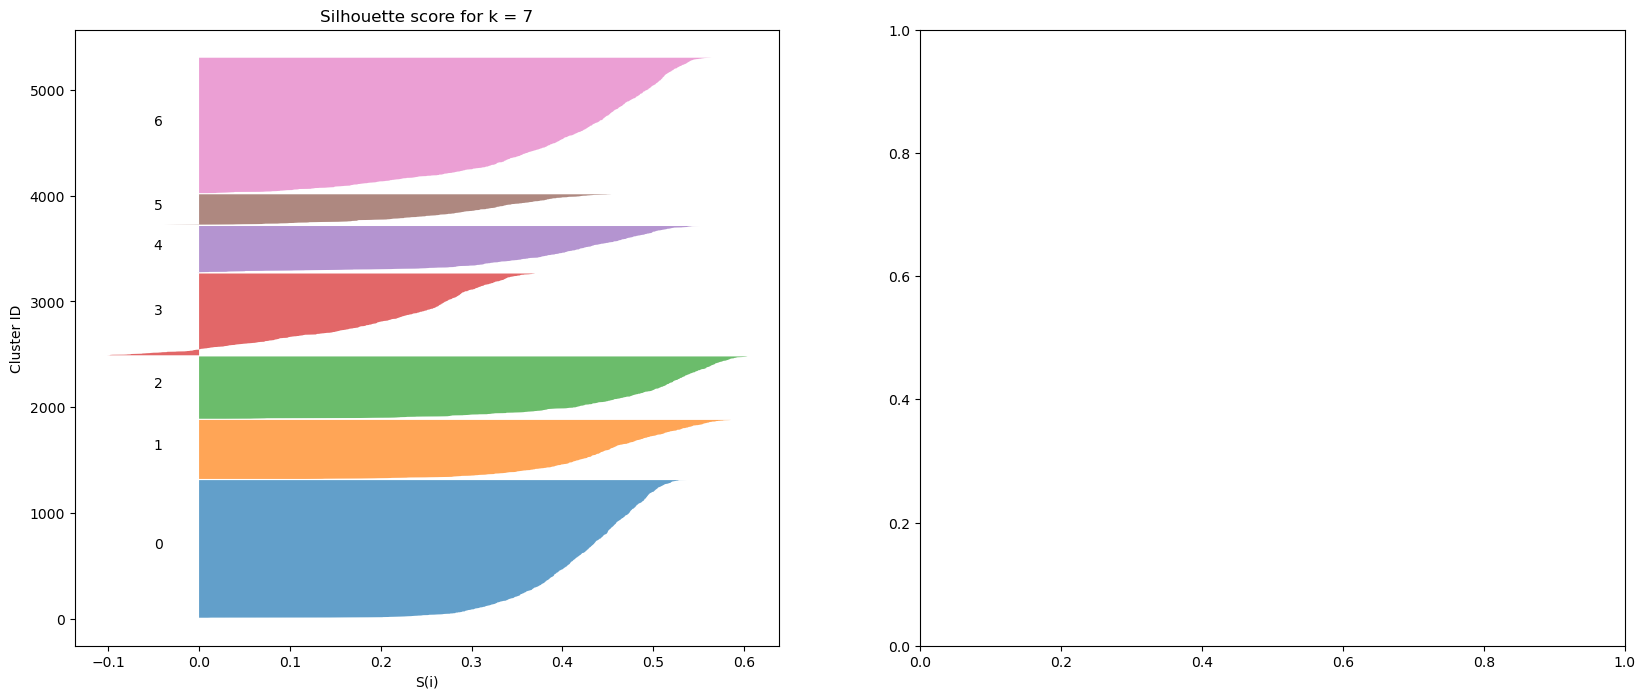

* For k = 8 the average to silhouette is: 0.3935
	- For cluster = 0 the silhouette value is: 0.47
	- For cluster = 1 the silhouette value is: 0.4
	- For cluster = 2 the silhouette value is: 0.38
	- For cluster = 3 the silhouette value is: 0.44
	- For cluster = 4 the silhouette value is: 0.44
	- For cluster = 5 the silhouette value is: 0.37
	- For cluster = 6 the silhouette value is: 0.29
	- For cluster = 7 the silhouette value is: 0.26


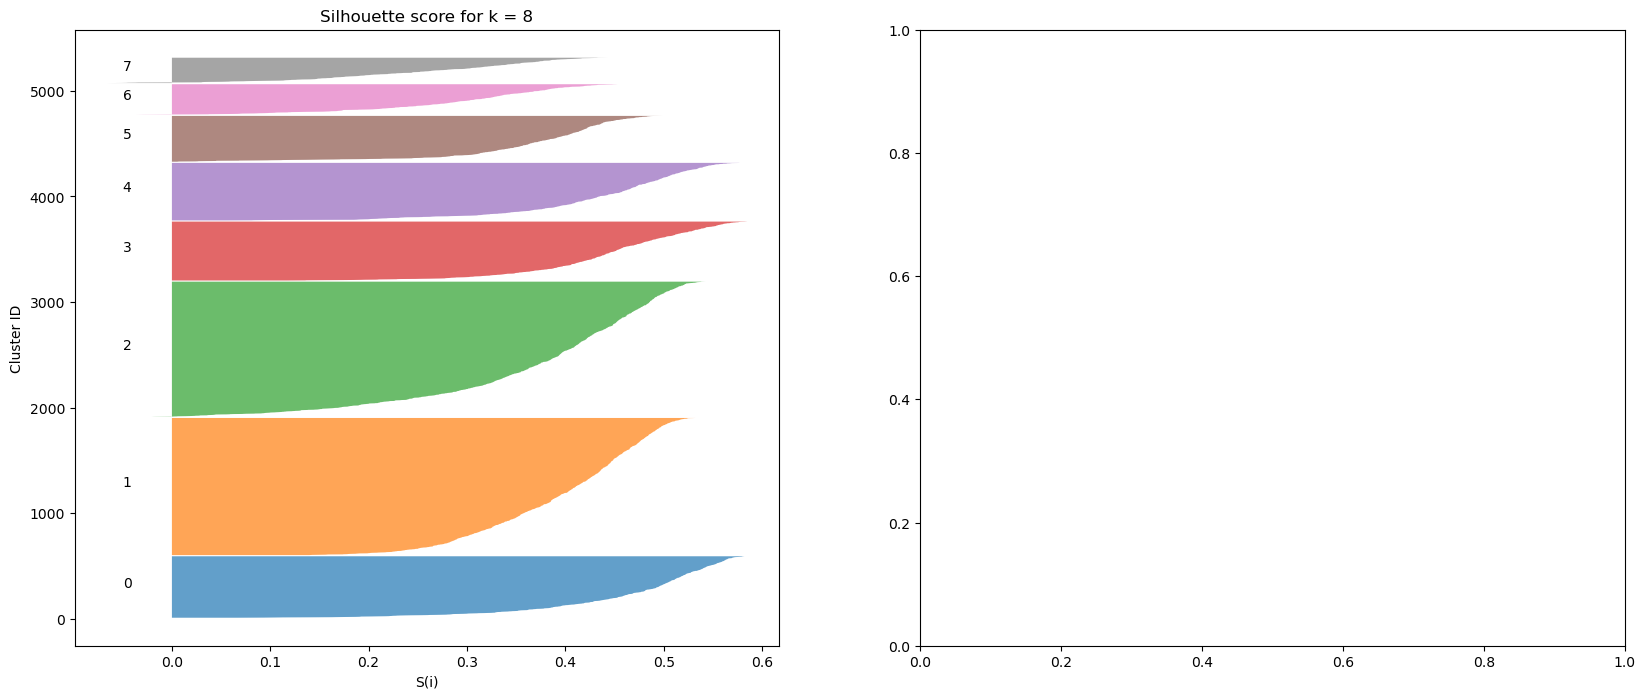

* For k = 9 the average to silhouette is: 0.3879
	- For cluster = 0 the silhouette value is: 0.39
	- For cluster = 1 the silhouette value is: 0.29
	- For cluster = 2 the silhouette value is: 0.36
	- For cluster = 3 the silhouette value is: 0.46
	- For cluster = 4 the silhouette value is: 0.44
	- For cluster = 5 the silhouette value is: 0.38
	- For cluster = 6 the silhouette value is: 0.38
	- For cluster = 7 the silhouette value is: 0.43
	- For cluster = 8 the silhouette value is: 0.24


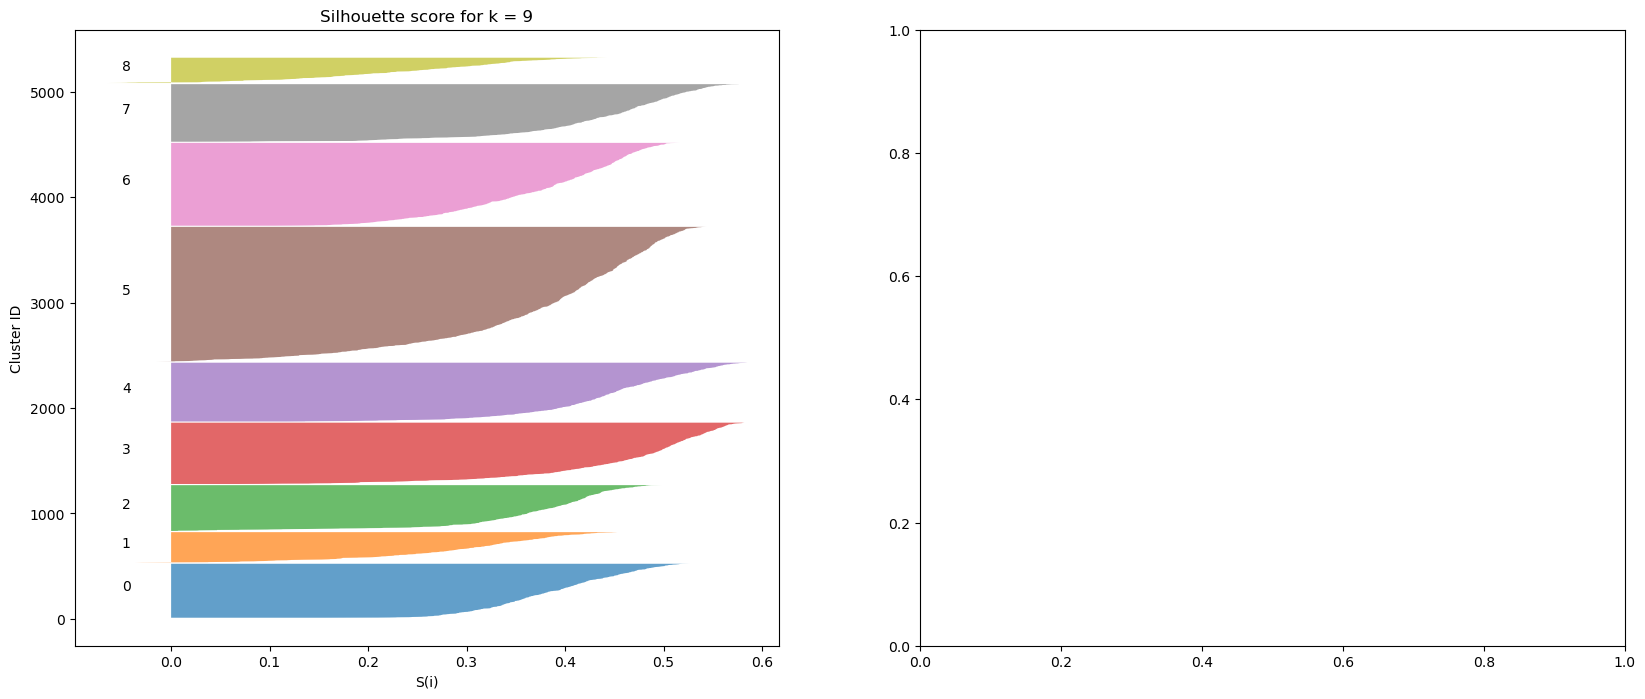

In [43]:
# analysis with silouette scores and knives plots 
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 10
data = centroid_distances

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    # if 1 < k: 
    #     centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
    #     centr_df_temp.columns = columns
    #     centr_df_temp['cluster_name'] = centr_df_temp.index

    #     plot_data = pd.DataFrame(data)
    #     plot_data.columns = columns
    #     plot_data['cluster'] = kmean_model.predict(data)

    #     plt.title('Penguins clusters with centroids using Kmeans')
    #     sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
    #     sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
    #     for i in range(centr_df_temp.shape[0]):
    #         plt.text(
    #             x=centr_df_temp.bill_length_mm[i], 
    #             y=centr_df_temp.bill_depth_mm[i],
    #             s=centr_df_temp.cluster_name[i], 
    #             size=20
    #         )
        plt.show()

In [44]:
# silhouette score for k = 8 is the best one
# filter cluster 5 and 6 from k=8

cluster_5 = centroid_distances[centroid_distances['cluster'] == 5]
cluster_5

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist,,,,,,,,,,,
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,5
Previsao - Bossacucanova - 5iKuMCDh634YGrg2HrhtHp,0.754503,0.729899,0.217198,0.739894,-0.631838,0.985970,0.271585,-0.310274,0.332748,-0.655555,5
Nova Bossa Nova - Marcos Valle - 2RPHy1PlxehscIM1K1wQMy,0.405912,0.296334,-0.200803,0.739894,-0.533504,0.654464,1.261736,-0.263418,1.575102,-0.829785,5
Parabens - Marcos Valle - 596scNUBRpj2AygfaBVyTj,1.043468,0.514851,0.201628,0.739894,-0.572838,-0.773824,0.239210,-0.640270,0.116686,-0.311576,5
País Tropical - Wilson Simonal - 5bcc5zWUX4zjCnAvyyuHu4,0.910452,-0.189259,-0.028264,0.739894,-0.696457,1.132058,-0.694283,0.740628,1.704738,0.361503,5
...,...,...,...,...,...,...,...,...,...,...,...
The Victory Song - Live - Joyous Celebration - 2vje5WEGnFNhk0PeU53kvF,0.965493,-0.272503,-0.359042,0.739894,-0.116290,-0.808997,-0.694275,-0.649641,0.592022,0.394969,5
Won't Let Me Down - Jonathan Traylor - 3Yk6zt2pSFdYcP9NS0uEB2,0.690289,-0.217007,-0.043040,0.739894,-0.685219,-0.543174,-0.694279,-0.557938,-0.221810,0.569374,5
Increase My Faith - Brian Courtney Wilson - 5IUqnJgMFwi0o6jq5K8Fj5,1.194830,0.115971,0.566723,0.739894,-0.386004,-0.806216,-0.694283,-0.776820,0.800881,0.395039,5


In [45]:
cluster_8 = centroid_distances[centroid_distances['cluster'] == 8]
cluster_8

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist,,,,,,,,,,,
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,8
O Meu Amor É Glòria - Sílvia Pérez Cruz - 0ylJQpV3K4XnhWhLDMFmH7,-0.025241,0.275523,-0.219550,0.739894,4.296071,1.140486,-0.694132,3.264131,1.593107,-0.775629,8
Karoliina Kaunis - Maria Gasolina - 7BlLxHwobm2gHjXev9dNVe,1.116855,-1.521170,-1.006141,-1.351545,2.947499,0.921355,-0.681765,-0.630230,-0.221810,0.406662,8
Vai (Menina amanhã de manhã) - Tom Zé - 5OjDD3tZErNCn5QqqpJmKf,0.740743,-0.081735,-0.163467,0.739894,2.160831,1.671459,-0.694283,-0.357129,1.261812,0.312388,8
Baianá - Barbatuques - 4bndkI1TTh7itdsyixtDoD,1.226937,-0.279440,-0.435302,-1.351545,3.537499,0.505567,-0.657051,-0.055915,0.642436,-0.827369,8
...,...,...,...,...,...,...,...,...,...,...,...
He Did It - Live - The Brown Boyz - 7AsqSgx2o7CyTtJMPYknrh,-0.066521,0.861703,0.699702,0.739894,1.514640,-0.811554,-0.694283,1.115472,1.110569,-0.304015,8
Follow God - Kanye West - 2QpGZOhTCHHiKmpSO9FW4h,0.089427,0.854766,0.927052,0.739894,4.703452,-0.814144,-0.694250,-0.955541,-0.034557,2.155365,8
Happy - Live/Remastered - Tasha Cobbs Leonard - 3xi1xCFDUkOiUGJqlztGNC,-0.497674,0.802738,0.569583,0.739894,5.082738,-0.331628,-0.694283,-0.576681,-0.016552,1.898449,8


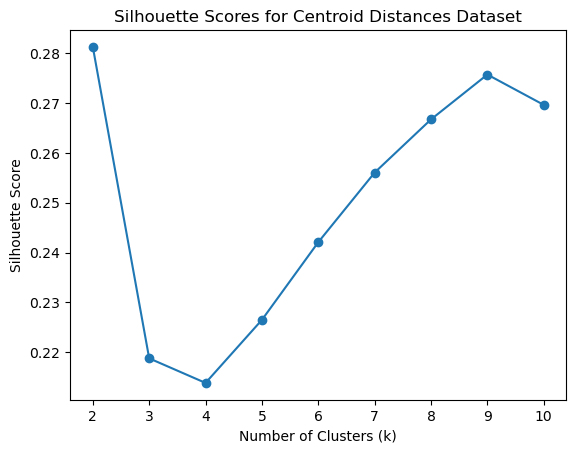

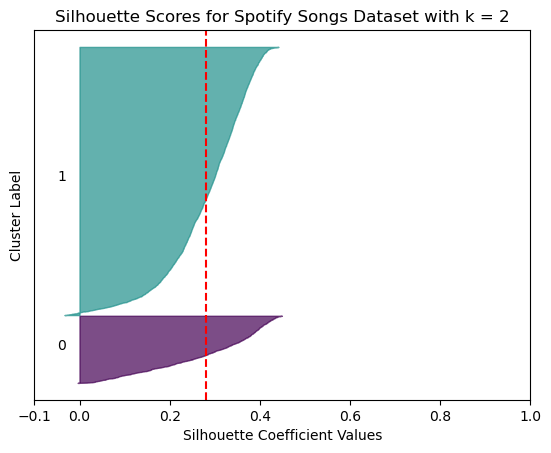

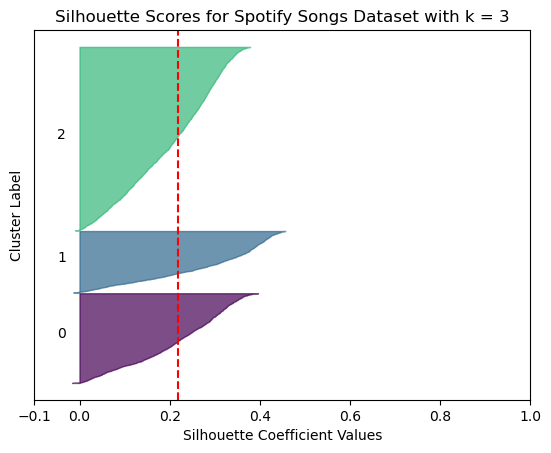

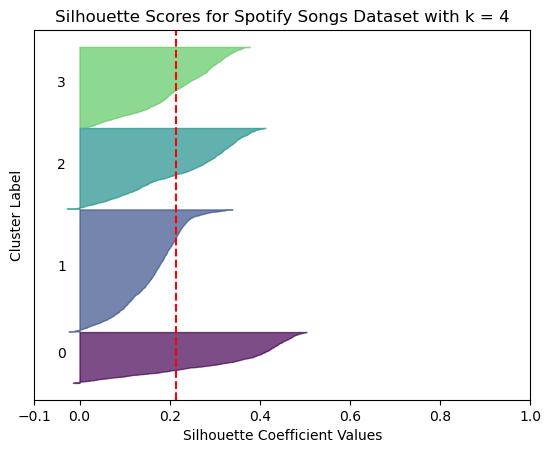

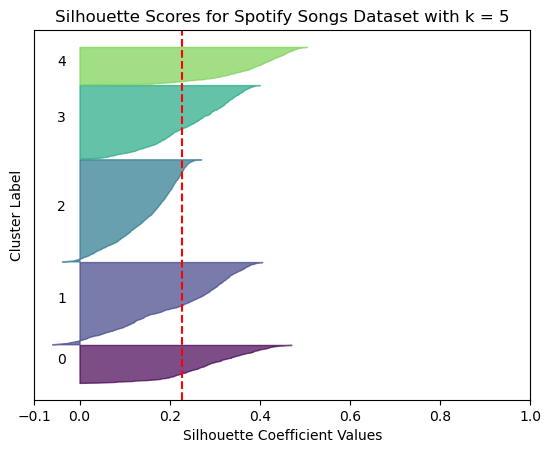

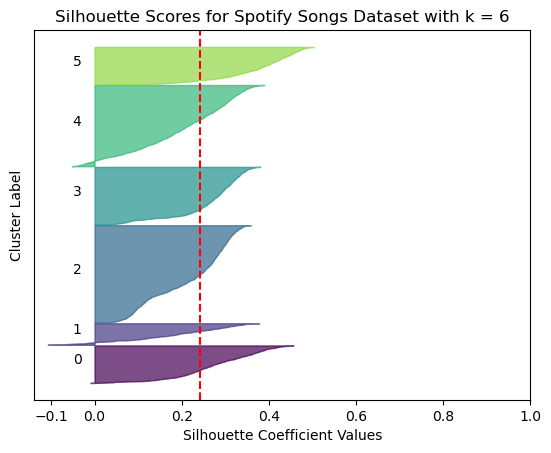

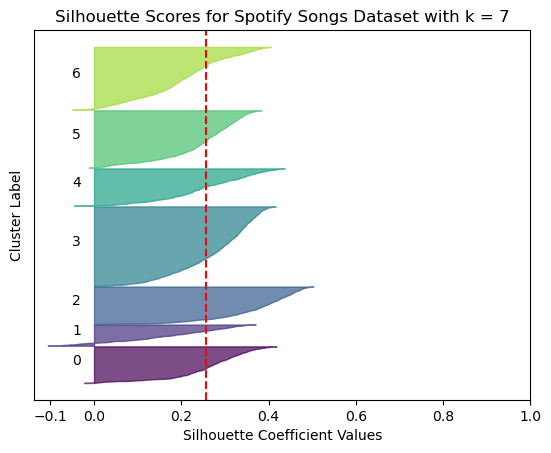

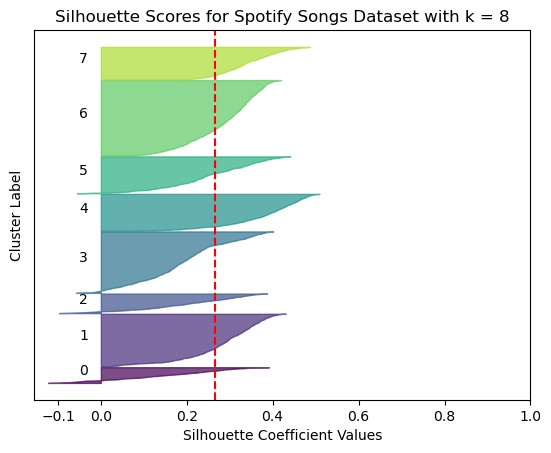

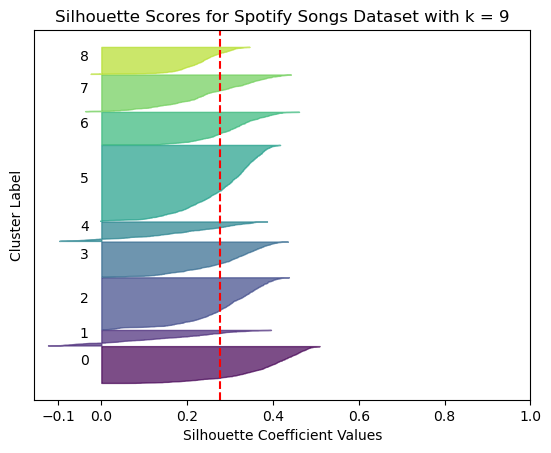

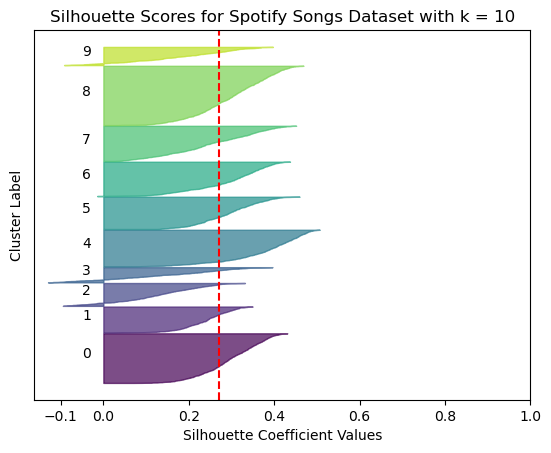

In [46]:
# This code provides a better visualisation of the knives chart
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap


# # Prepare the features for clustering
# features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# scaled_features = StandardScaler().fit_transform(features)

features = centroid_distances.copy()
scaled_features = StandardScaler().fit_transform(features)

import numpy as np

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Centroid Distances Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Spotify Songs Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)

   


spotipy

In [57]:
# %pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [48]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [49]:
from config import client_id, client_secret

In [51]:
import config

In [52]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret))

In [53]:
sp.search(q=['tracks'], limit=40)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=tracks&type=track&offset=0&limit=40',
  'items': [{'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5jbk18C7YXRcEZxUWPJCyT'},
       'href': 'https://api.spotify.com/v1/artists/5jbk18C7YXRcEZxUWPJCyT',
       'id': '5jbk18C7YXRcEZxUWPJCyT',
       'name': 'Ocie Elliott',
       'type': 'artist',
       'uri': 'spotify:artist:5jbk18C7YXRcEZxUWPJCyT'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
 

In [254]:
results = sp.search(q=['Billy Joel'], type='track', limit=50)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Billy+Joel&type=track&offset=0&limit=50',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6zFYqv1mOsgBRQbae3JJ9e'},
       'href': 'https://api.spotify.com/v1/artists/6zFYqv1mOsgBRQbae3JJ9e',
       'id': '6zFYqv1mOsgBRQbae3JJ9e',
       'name': 'Billy Joel',
       'type': 'artist',
       'uri': 'spotify:artist:6zFYqv1mOsgBRQbae3JJ9e'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
 

In [257]:
results.keys()

dict_keys(['tracks'])

In [256]:
# getting id
results['tracks']['items'][0]['artists'][0]['name']

'Billy Joel'

In [191]:
results['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [54]:
# Send request and store the response.
red_hot = sp.search(q="Red Hot Chili Peppers", limit=10)

# Initialize empty lists that we will fill with information from our loop.
list_of_uri = []
list_of_song_names = []

# Iterate through the "items" (the songs),
# and append the "uri" and the "name" to the lists we created.
for item in red_hot["tracks"]["items"]:
    list_of_uri.append(item["uri"])
    list_of_song_names.append(item["name"])

# Print results.
print(list_of_uri)
print("\n")
print(list_of_song_names)

['spotify:track:3d9DChrdc6BOeFsbrZ3Is0', 'spotify:track:0uppYCG86ajpV2hSR3dJJ0', 'spotify:track:64BbK9SFKH2jk86U3dGj2P', 'spotify:track:1G391cbiT3v3Cywg8T7DM1', 'spotify:track:48UPSzbZjgc449aqz8bxox', 'spotify:track:3ZOEytgrvLwQaqXreDs2Jx', 'spotify:track:2aibwv5hGXSgw7Yru8IYTO', 'spotify:track:10Nmj3JCNoMeBQ87uw5j8k', 'spotify:track:2oaK4JLVnmRGIO9ytBE1bt', 'spotify:track:1f2V8U1BiWaC9aJWmpOARe']


['Under the Bridge', 'Give It Away', 'Otherside', 'Scar Tissue', 'Californication', "Can't Stop", 'Snow (Hey Oh)', 'Dani California', 'Dark Necessities', 'By the Way']


In [202]:
artists = ["Red Hot Chili Peppers", "SCARR", "Whitney Houston"]

In [203]:
results = []

for artist in artists:
    results.append(sp.search(q=artist, limit=10)) 

In [205]:
results[1]

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=SCARR&type=track&offset=0&limit=10',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4fxd5Ee7UefO4CUXgwJ7IP'},
       'href': 'https://api.spotify.com/v1/artists/4fxd5Ee7UefO4CUXgwJ7IP',
       'id': '4fxd5Ee7UefO4CUXgwJ7IP',
       'name': 'Giveon',
       'type': 'artist',
       'uri': 'spotify:artist:4fxd5Ee7UefO4CUXgwJ7IP'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ'

In [206]:
song_names = []

for result in results:
    for item in result["tracks"]["items"]:
        song_names.append(item["name"])

In [207]:
song_names

['Under the Bridge',
 'Otherside',
 'Californication',
 'Scar Tissue',
 'Give It Away',
 "Can't Stop",
 'Snow (Hey Oh)',
 'Dani California',
 'The Zephyr Song',
 'By the Way',
 'Scarred',
 'SCARR',
 'Scar',
 'Scarred From Love',
 'SCAR',
 "Scarred Baby's",
 'SCAR',
 'Scarred',
 'Scar',
 'Emotionally Scarred',
 'I Wanna Dance with Somebody (Who Loves Me)',
 'I Will Always Love You',
 'Higher Love',
 'I Have Nothing',
 'Greatest Love of All',
 'How Will I Know',
 "It's Not Right But It's Okay",
 'Higher Love',
 'Saving All My Love for You',
 'How Will I Know']

In [262]:
cluster_5

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist,,,,,,,,,,,
Oats In The Water - Ben Howard,-0.667383,-0.619355,-0.016507,-1.351545,-0.762481,-0.042262,0.533287,0.017715,-1.250263,0.320230,5
How to Disappear Completely - Radiohead,-1.566382,-1.219409,-0.366509,-1.351545,-0.685219,0.070113,1.437103,-0.504389,-0.859192,-0.583931,5
California Dreamin' - Remastered - Bobby Womack,0.960906,-0.667914,-0.317735,-1.351545,-0.648695,-0.731121,1.466780,-0.816313,-1.222896,-0.270618,5
Come Saturday - The Pains Of Being Pure At Heart,-1.589316,0.986569,0.677936,-1.351545,-0.162647,-0.814836,1.844494,0.687079,0.170701,2.153860,5
Objecte Pur - Isaac Ulam,-0.327965,1.111436,0.601994,-1.351545,-0.435171,-0.814831,1.315695,1.209183,0.980932,1.441993,5
...,...,...,...,...,...,...,...,...,...,...,...
Allein Allein - Polarkreis 18,-0.204123,0.660529,0.774373,-1.351545,-0.506814,-0.813281,-0.660019,0.084651,-1.129269,0.464493,5
Sonnentanz - Klangkarussell,1.392059,-0.917648,-0.138365,-1.351545,0.517258,0.103826,1.758160,-0.583374,-1.014036,0.043184,5
Sonnentanz - Klangkarussell,0.626075,-1.021704,-0.166803,-1.351545,1.008926,-0.120924,1.771650,-0.657004,-1.042844,0.040734,5


In [55]:
#this code creates a column song_name in cluster_5 based on 'name_artist' index by extracting from index a string before '-' and assigns it to a new column 'song_name'


cluster_5['song_name'] = cluster_5.index.str.split('-').str[0]
cluster_5

#the below code is not suitable because there is no 'name_artist' column in cluster_5
# cluster_5['song_name'] = cluster_5['name_artist'].str.split('-').str[0]

/var/folders/fv/j2glptx96zv4jxc02f5d5ff40000gn/T/ipykernel_48338/2718589960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_5['song_name'] = cluster_5.index.str.split('-').str[0]


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,song_name
name_artist,,,,,,,,,,,,
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,5,Saudade De Bahia ...
Previsao - Bossacucanova - 5iKuMCDh634YGrg2HrhtHp,0.754503,0.729899,0.217198,0.739894,-0.631838,0.985970,0.271585,-0.310274,0.332748,-0.655555,5,Previsao ...
Nova Bossa Nova - Marcos Valle - 2RPHy1PlxehscIM1K1wQMy,0.405912,0.296334,-0.200803,0.739894,-0.533504,0.654464,1.261736,-0.263418,1.575102,-0.829785,5,Nova Bossa Nova ...
Parabens - Marcos Valle - 596scNUBRpj2AygfaBVyTj,1.043468,0.514851,0.201628,0.739894,-0.572838,-0.773824,0.239210,-0.640270,0.116686,-0.311576,5,Parabens ...
País Tropical - Wilson Simonal - 5bcc5zWUX4zjCnAvyyuHu4,0.910452,-0.189259,-0.028264,0.739894,-0.696457,1.132058,-0.694283,0.740628,1.704738,0.361503,5,País Tropical ...
...,...,...,...,...,...,...,...,...,...,...,...,...
The Victory Song - Live - Joyous Celebration - 2vje5WEGnFNhk0PeU53kvF,0.965493,-0.272503,-0.359042,0.739894,-0.116290,-0.808997,-0.694275,-0.649641,0.592022,0.394969,5,The Victory Song
Won't Let Me Down - Jonathan Traylor - 3Yk6zt2pSFdYcP9NS0uEB2,0.690289,-0.217007,-0.043040,0.739894,-0.685219,-0.543174,-0.694279,-0.557938,-0.221810,0.569374,5,Won't Let Me Down ...
Increase My Faith - Brian Courtney Wilson - 5IUqnJgMFwi0o6jq5K8Fj5,1.194830,0.115971,0.566723,0.739894,-0.386004,-0.806216,-0.694283,-0.776820,0.800881,0.395039,5,Increase My Faith ...
